# Import Libraries

In [1]:
from ultralytics import YOLO
import os

### 1. from ultralytics import YOLO
- Imports the **YOLO** class from the `ultralytics` library.
- YOLO is used for **object detection** in images or videos.
- It allows you to **load models, train, and predict** objects.

### 2. import os
- Imports Python's **os module** for working with files and folders.
- Helps to **find, save, and manage** images and prediction results.
- Makes file paths work correctly on any system (Windows, Mac, Linux).

# Loading the Trained YOLOv8 Model

In [59]:
# Loading the trained YOLOv8s model
model_path = r"runs\detect\traffic_sign_yolov8s4\weights\best.pt"
model = YOLO(model_path)

### 1. `model_path = r"runs\detect\traffic_sign_yolov8s4\weights\best.pt"`
- This sets the **path to your trained YOLOv8 model** file (`best.pt`).
- The `r` before the string makes it a **raw string**, so Windows backslashes `\` are handled correctly.

### 2. `model = YOLO(model_path)`
- This **loads the trained YOLO model** from the specified path.
- After loading, you can use `model` to **detect traffic signs in images or videos**.

# Evaluating Model Performance

In [60]:
# Evaluating model performance on validation dataset
results = model.val(data="car_detection/data.yaml")

Ultralytics 8.3.205  Python-3.12.8 torch-2.8.0+cpu CPU (Intel Core i5-9300H 2.40GHz)
Model summary (fused): 72 layers, 11,131,389 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 23.17.6 MB/s, size: 20.8 KB)
val: Scanning C:\Users\Sambridhi Shrestha\Documents\Traffic Signs Detection\car_detection\valid\labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 801/801 400.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 51/51 0.2it/s 3:324.0ss
                   all        801        944      0.933      0.869      0.939        0.8
           Green Light         87        122      0.878      0.649      0.776       0.47
             Red Light         74        108      0.822       0.77      0.794      0.467
       Speed Limit 100         52         52      0.874      0.936      0.948       0.86
       Speed Limit 110         17         17          1       0.86      0.96

### `results = model.val(data="car_detection/data.yaml")`
- This line **evaluates the trained YOLO model** on the validation dataset.
- `data="car_detection/data.yaml"` specifies the dataset configuration:
  - Paths to **images** and **labels** for training, validation, and testing.
  - List of **class names**.
- `model.val()` computes metrics like **precision, recall, mAP**, etc., to check how well the model is performing.
- The results are stored in the variable `results`.

# Predicting and Visualizing Objects on Test Images

In [61]:
# Predict and visualize bounding boxes on test images
model.predict(
    source="car_detection/test/images",  # path to test images
    conf=0.5,                            # confidence threshold
    save=True,                           
    show=True                            
)


image 1/638 C:\Users\Sambridhi Shrestha\Documents\Traffic Signs Detection\car_detection\test\images\000003_jpg.rf.8511b9c219dbf9799a6d58900b15917d.jpg: 640x640 1 Speed Limit 30, 333.6ms
image 2/638 C:\Users\Sambridhi Shrestha\Documents\Traffic Signs Detection\car_detection\test\images\000006_jpg.rf.89610ec419ccfab22f8314026b90ee26.jpg: 640x640 1 Speed Limit 30, 304.5ms
image 3/638 C:\Users\Sambridhi Shrestha\Documents\Traffic Signs Detection\car_detection\test\images\00000_00000_00003_png.rf.d18afc3c9625ffb1974029d3e3762aee.jpg: 640x640 1 Speed Limit 20, 389.0ms
image 4/638 C:\Users\Sambridhi Shrestha\Documents\Traffic Signs Detection\car_detection\test\images\00000_00000_00005_png.rf.ab60a274676963d378f5014e89d9e2b1.jpg: 640x640 1 Speed Limit 20, 279.9ms
image 5/638 C:\Users\Sambridhi Shrestha\Documents\Traffic Signs Detection\car_detection\test\images\00000_00000_00006_png.rf.9d1ea68507aff6973a1dbcdc6f4422a8.jpg: 640x640 1 Speed Limit 20, 293.4ms
image 6/638 C:\Users\Sambridhi Shres

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Green Light', 1: 'Red Light', 2: 'Speed Limit 10', 3: 'Speed Limit 100', 4: 'Speed Limit 110', 5: 'Speed Limit 120', 6: 'Speed Limit 20', 7: 'Speed Limit 30', 8: 'Speed Limit 40', 9: 'Speed Limit 50', 10: 'Speed Limit 60', 11: 'Speed Limit 70', 12: 'Speed Limit 80', 13: 'Speed Limit 90', 14: 'Stop'}
 obb: None
 orig_img: array([[[255, 245, 188],
         [255, 245, 188],
         [255, 245, 188],
         ...,
         [255, 245, 188],
         [255, 245, 188],
         [255, 245, 188]],
 
        [[218, 194, 136],
         [218, 194, 134],
         [218, 194, 136],
         ...,
         [218, 194, 134],
         [218, 194, 136],
         [218, 194, 134]],
 
        [[222, 194, 130],
         [222, 194, 129],
         [222, 194, 130],
         ...,
         [222, 194, 129],
         [222, 194, 130],
         [222, 194, 129]],
 
      

### `model.predict(...)`
- This line runs **object detection** on the test images using the trained YOLO model.

**Parameters explained:**
- `source="car_detection/test/images"` → folder containing the **test images**.
- `conf=0.5` → **confidence threshold**, only predictions with confidence ≥ 50% are shown.
- `save=True` → saves the predicted images with bounding boxes to a folder.
- `show=True` → displays the images with predicted bounding boxes **immediately**.

- The model detects objects (e.g., cars) and **draws bounding boxes** around them on the test images.

# Displaying Model Evaluation Metrics

In [62]:
# Displaying summarized metrics
print(results)

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000024B4FAF3FB0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,   

### `print(results)`
- This line **prints the evaluation results** of the YOLO model on the validation dataset.
- `results` contains metrics such as:
  - **Precision** – how accurate the predictions are.
  - **Recall** – how many true objects the model detected.
  - **mAP (mean Average Precision)** – overall performance of the model.
- Printing `results` helps to **understand how well model is performing**.

# Importing Libraries and Setting Paths

In [63]:
import os
from IPython.display import Image, display

# Path to your YOLO evaluation results folder
val_path = r"C:/Users/Sambridhi Shrestha/runs/detect/val2"

### `import os`
- Imports Python's **os module** to work with files and folders.
- Helps in **navigating directories** and accessing saved images.

### `from IPython.display import Image, display`
- Imports tools to **display images directly in Jupyter Notebook**.
- `Image` loads an image, `display` shows it in the notebook output.

### `val_path = r"C:/Users/Sambridhi Shrestha/runs/detect/val2"`
- Sets the **path to the folder** where YOLO saved evaluation results.
- The `r` makes it a **raw string**, so Windows paths with `\` or `/` are handled correctly.

# Displaying Model Evaluation Metrics

# F1 Curve

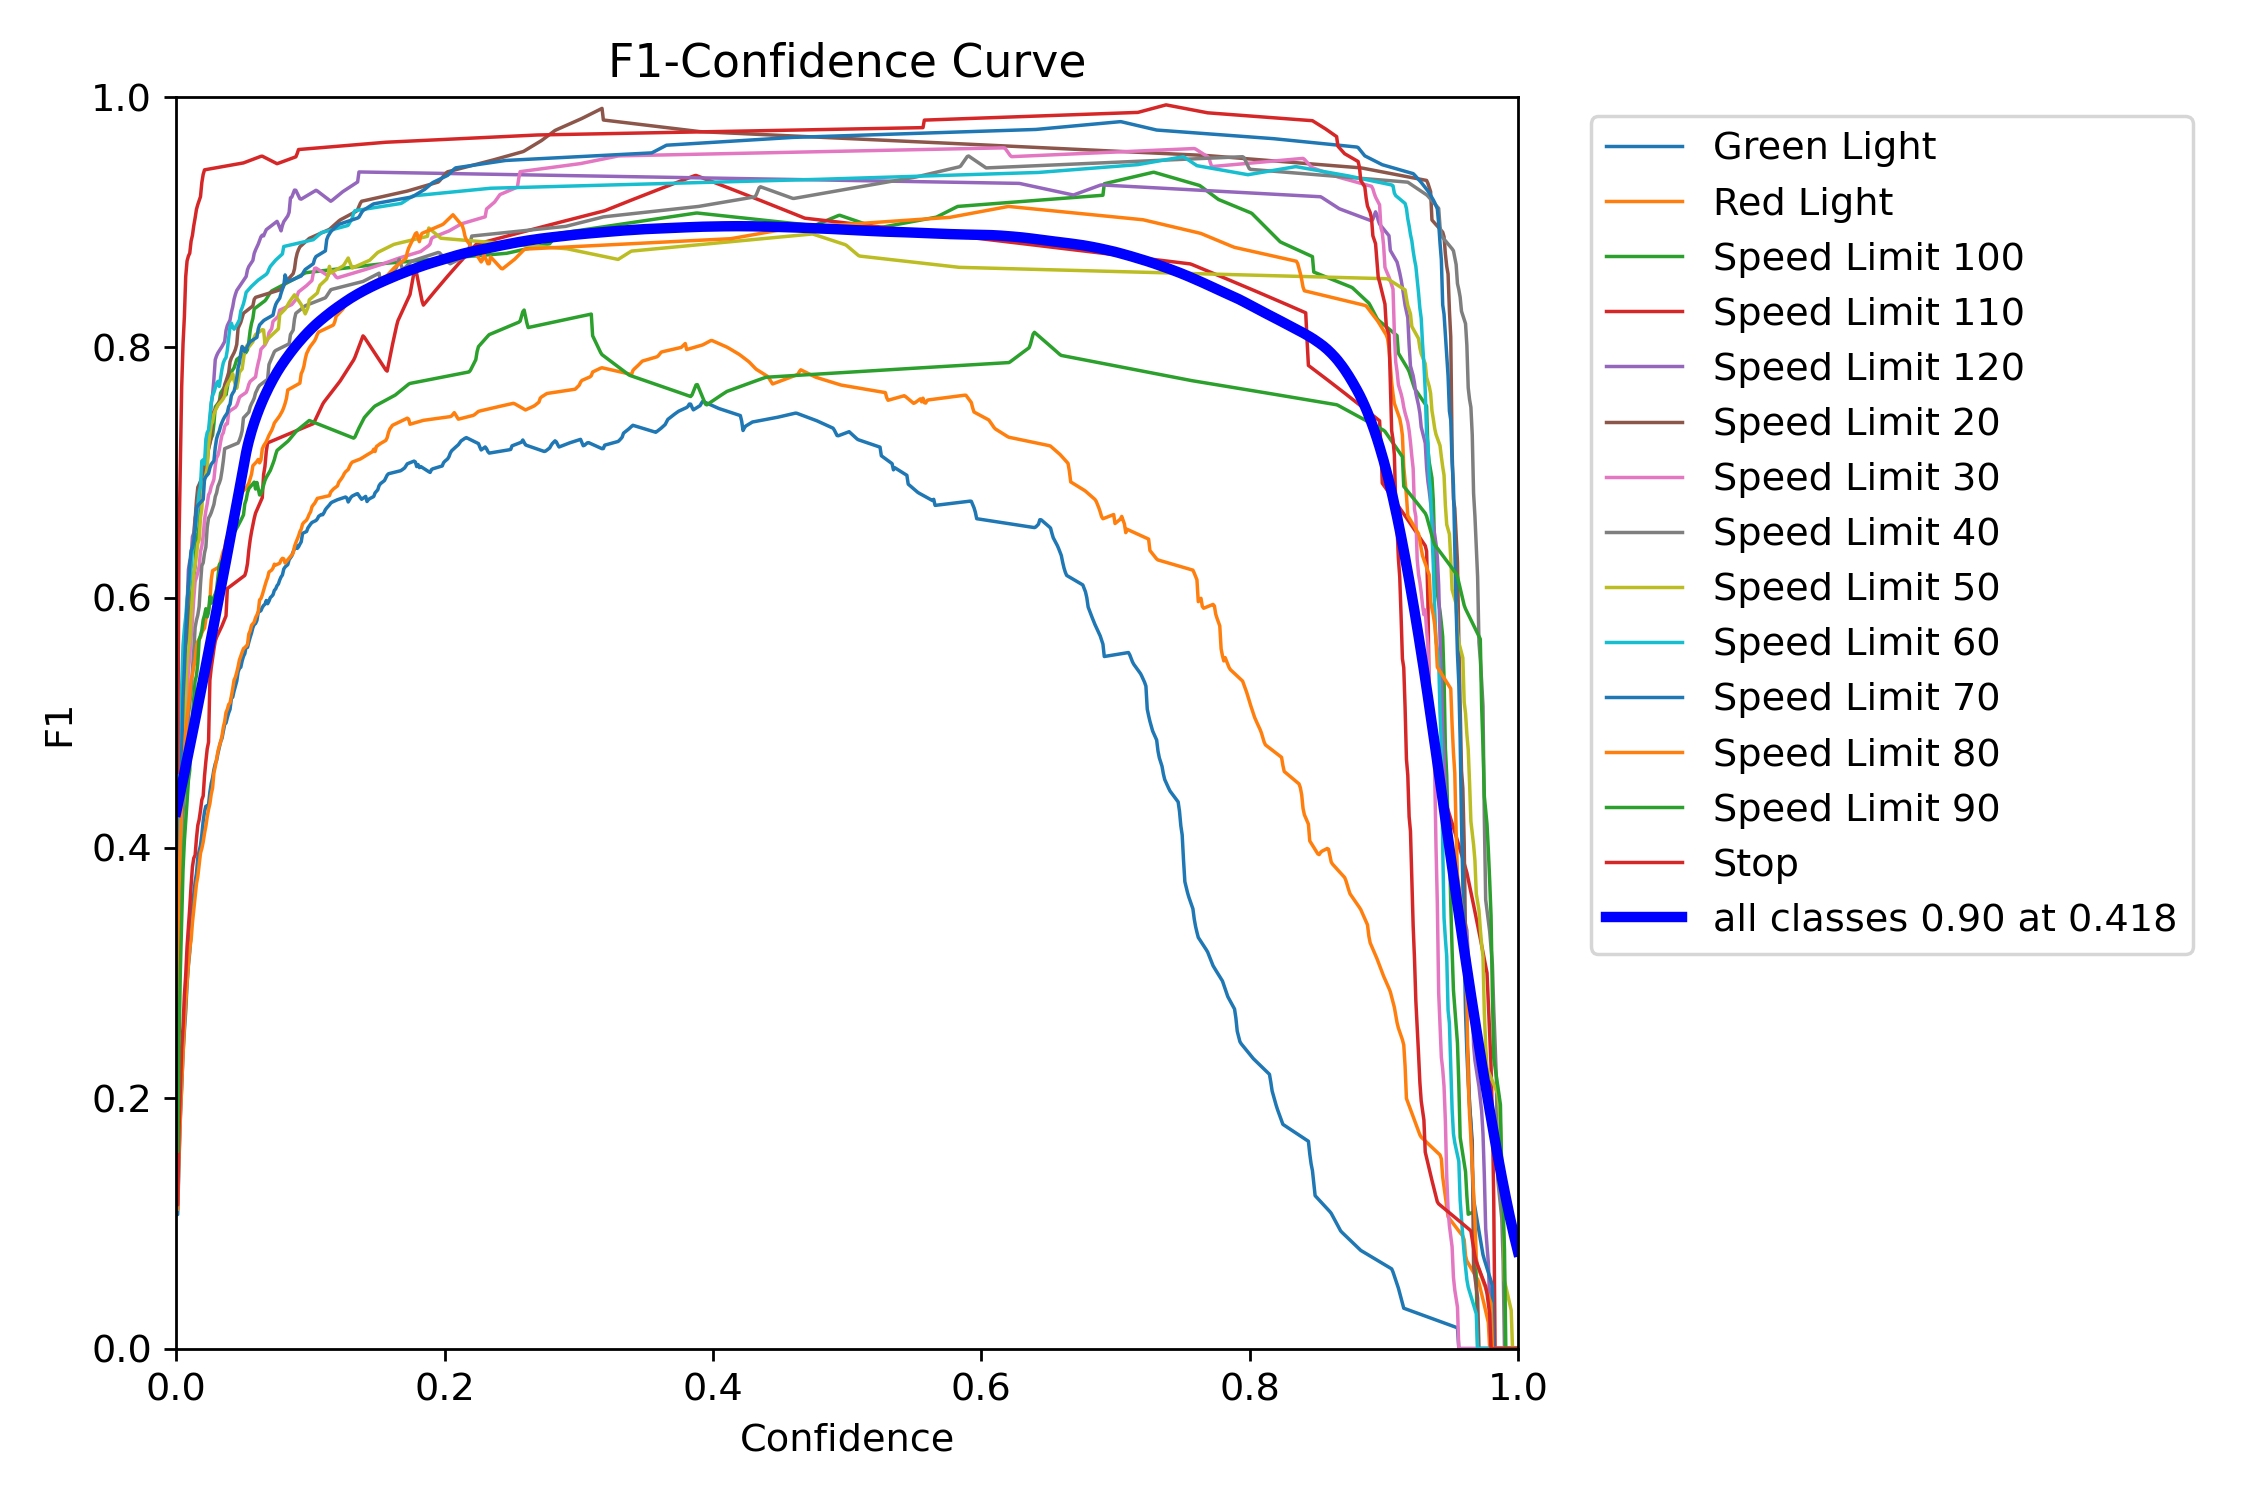

In [20]:
# Displays F1 Curve
f1_path = os.path.join(val_path, "BoxF1_curve.png")
if os.path.exists(f1_path):
    display(Image(filename=f1_path))
else:
    print("Missing file: BoxF1_curve.png")

# F1-Confidence Curve Explanation

This plot shows the **F1 score** for each class at different confidence thresholds for the YOLO model.  

**Key Points:**
- **X-axis (Confidence):** Model’s predicted confidence for each detection (0 = low, 1 = high).  
- **Y-axis (F1 Score):** Combines **precision** and **recall**; higher is better.  
- **Colored Lines:** Each traffic sign class; shows F1 variation with confidence.  
- **Bold Blue Line ("all classes"):** Average F1 across all classes. Peak = 0.90 at confidence ≈ 0.418.  

**Interpretation:**
- **Low confidence:** more predictions → more false positives → lower F1.  
- **High confidence:** fewer false positives, some true positives missed → F1 drops.  
- **Peak of each line:** optimal balance of precision and recall for that class.  

**Summary:** Confidence ≈ 0.418 gives the **best overall F1 (0.90)** for all classes.

# Precision Curve

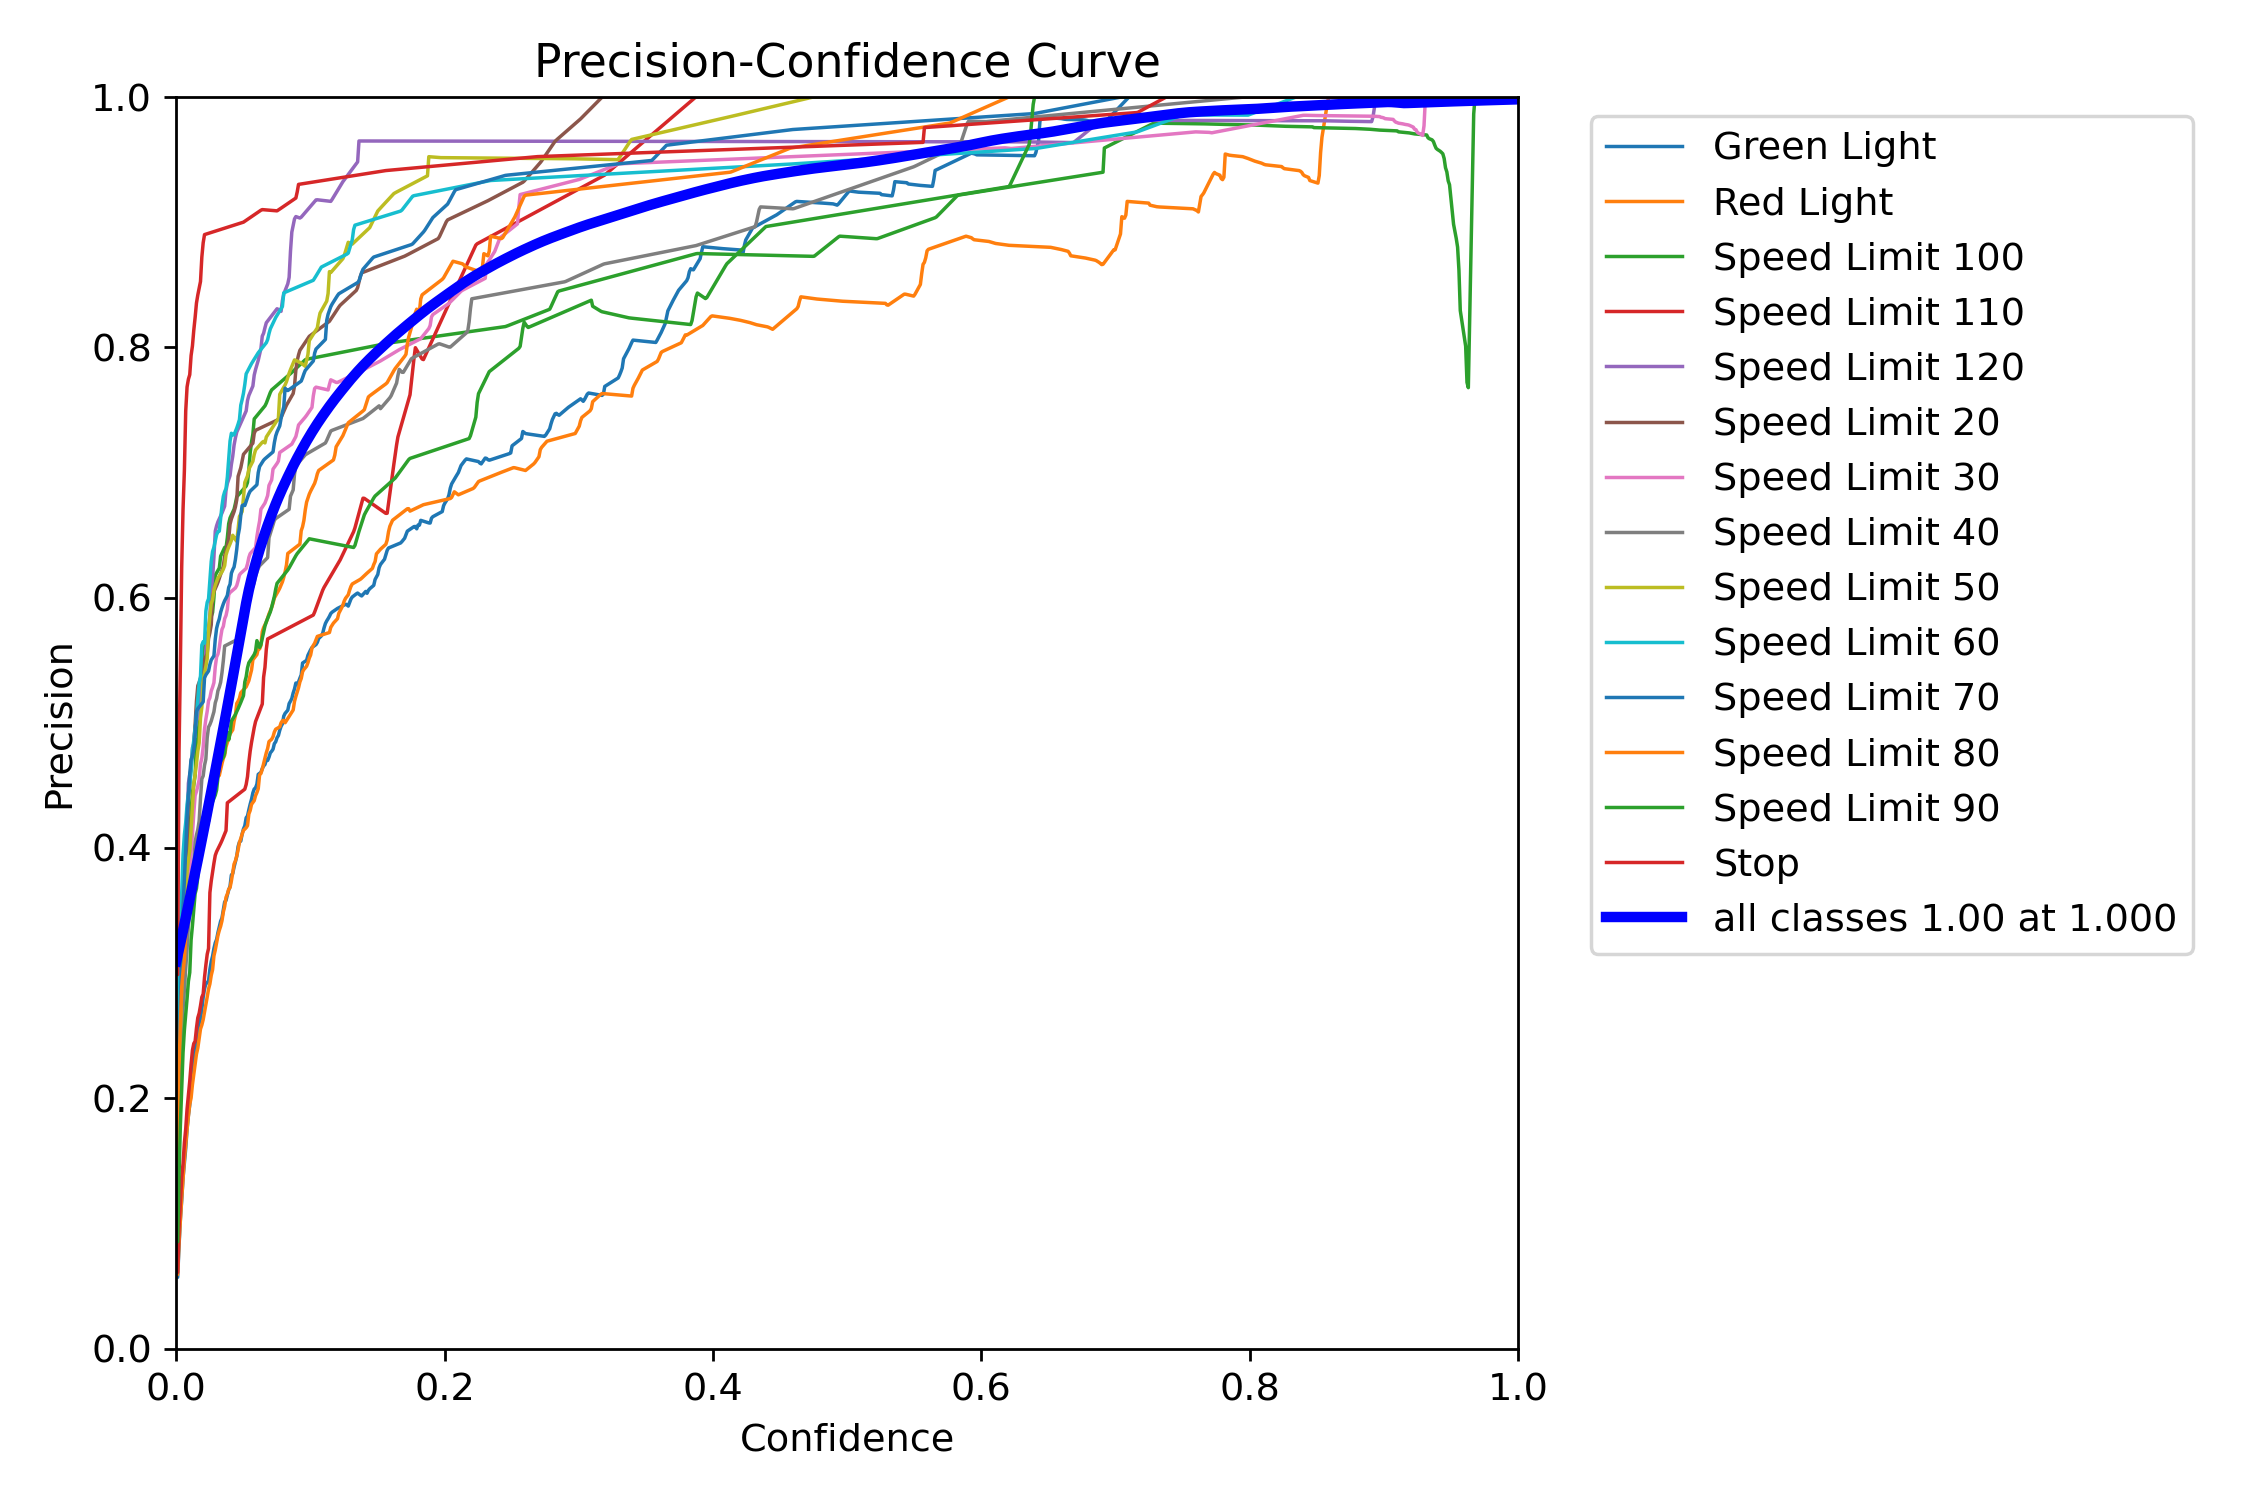

In [64]:
# Display Precision Curve
p_path = os.path.join(val_path, "BoxP_curve.png")
if os.path.exists(p_path):
    display(Image(filename=p_path))
else:
    print("Missing file: BoxP_curve.png")

# Precision Curve Explanation

This plot shows the **Precision** of the YOLO model for each class at different confidence thresholds.

### Key Points:
- **X-axis (Confidence):** Model’s predicted confidence for each detection (0 = low, 1 = high).  
- **Y-axis (Precision):** Measures accuracy of positive predictions (higher = fewer false positives).  
- **Colored Lines:** Each line represents a traffic sign class and shows how precision changes with confidence.  
- **Bold Blue Line ("all classes"):** Average precision across all classes.

### Interpretation:
- **Low confidence thresholds:** More predictions included → more false positives → lower precision.  
- **High confidence thresholds:** Only very confident predictions included → fewer false positives → higher precision.  
- **Peak of each line:** Indicates the confidence threshold where precision is optimal for that class.

**Summary:** The Precision curve helps identify the **best confidence threshold** for making accurate predictions with the YOLO model.


# Recall Curve

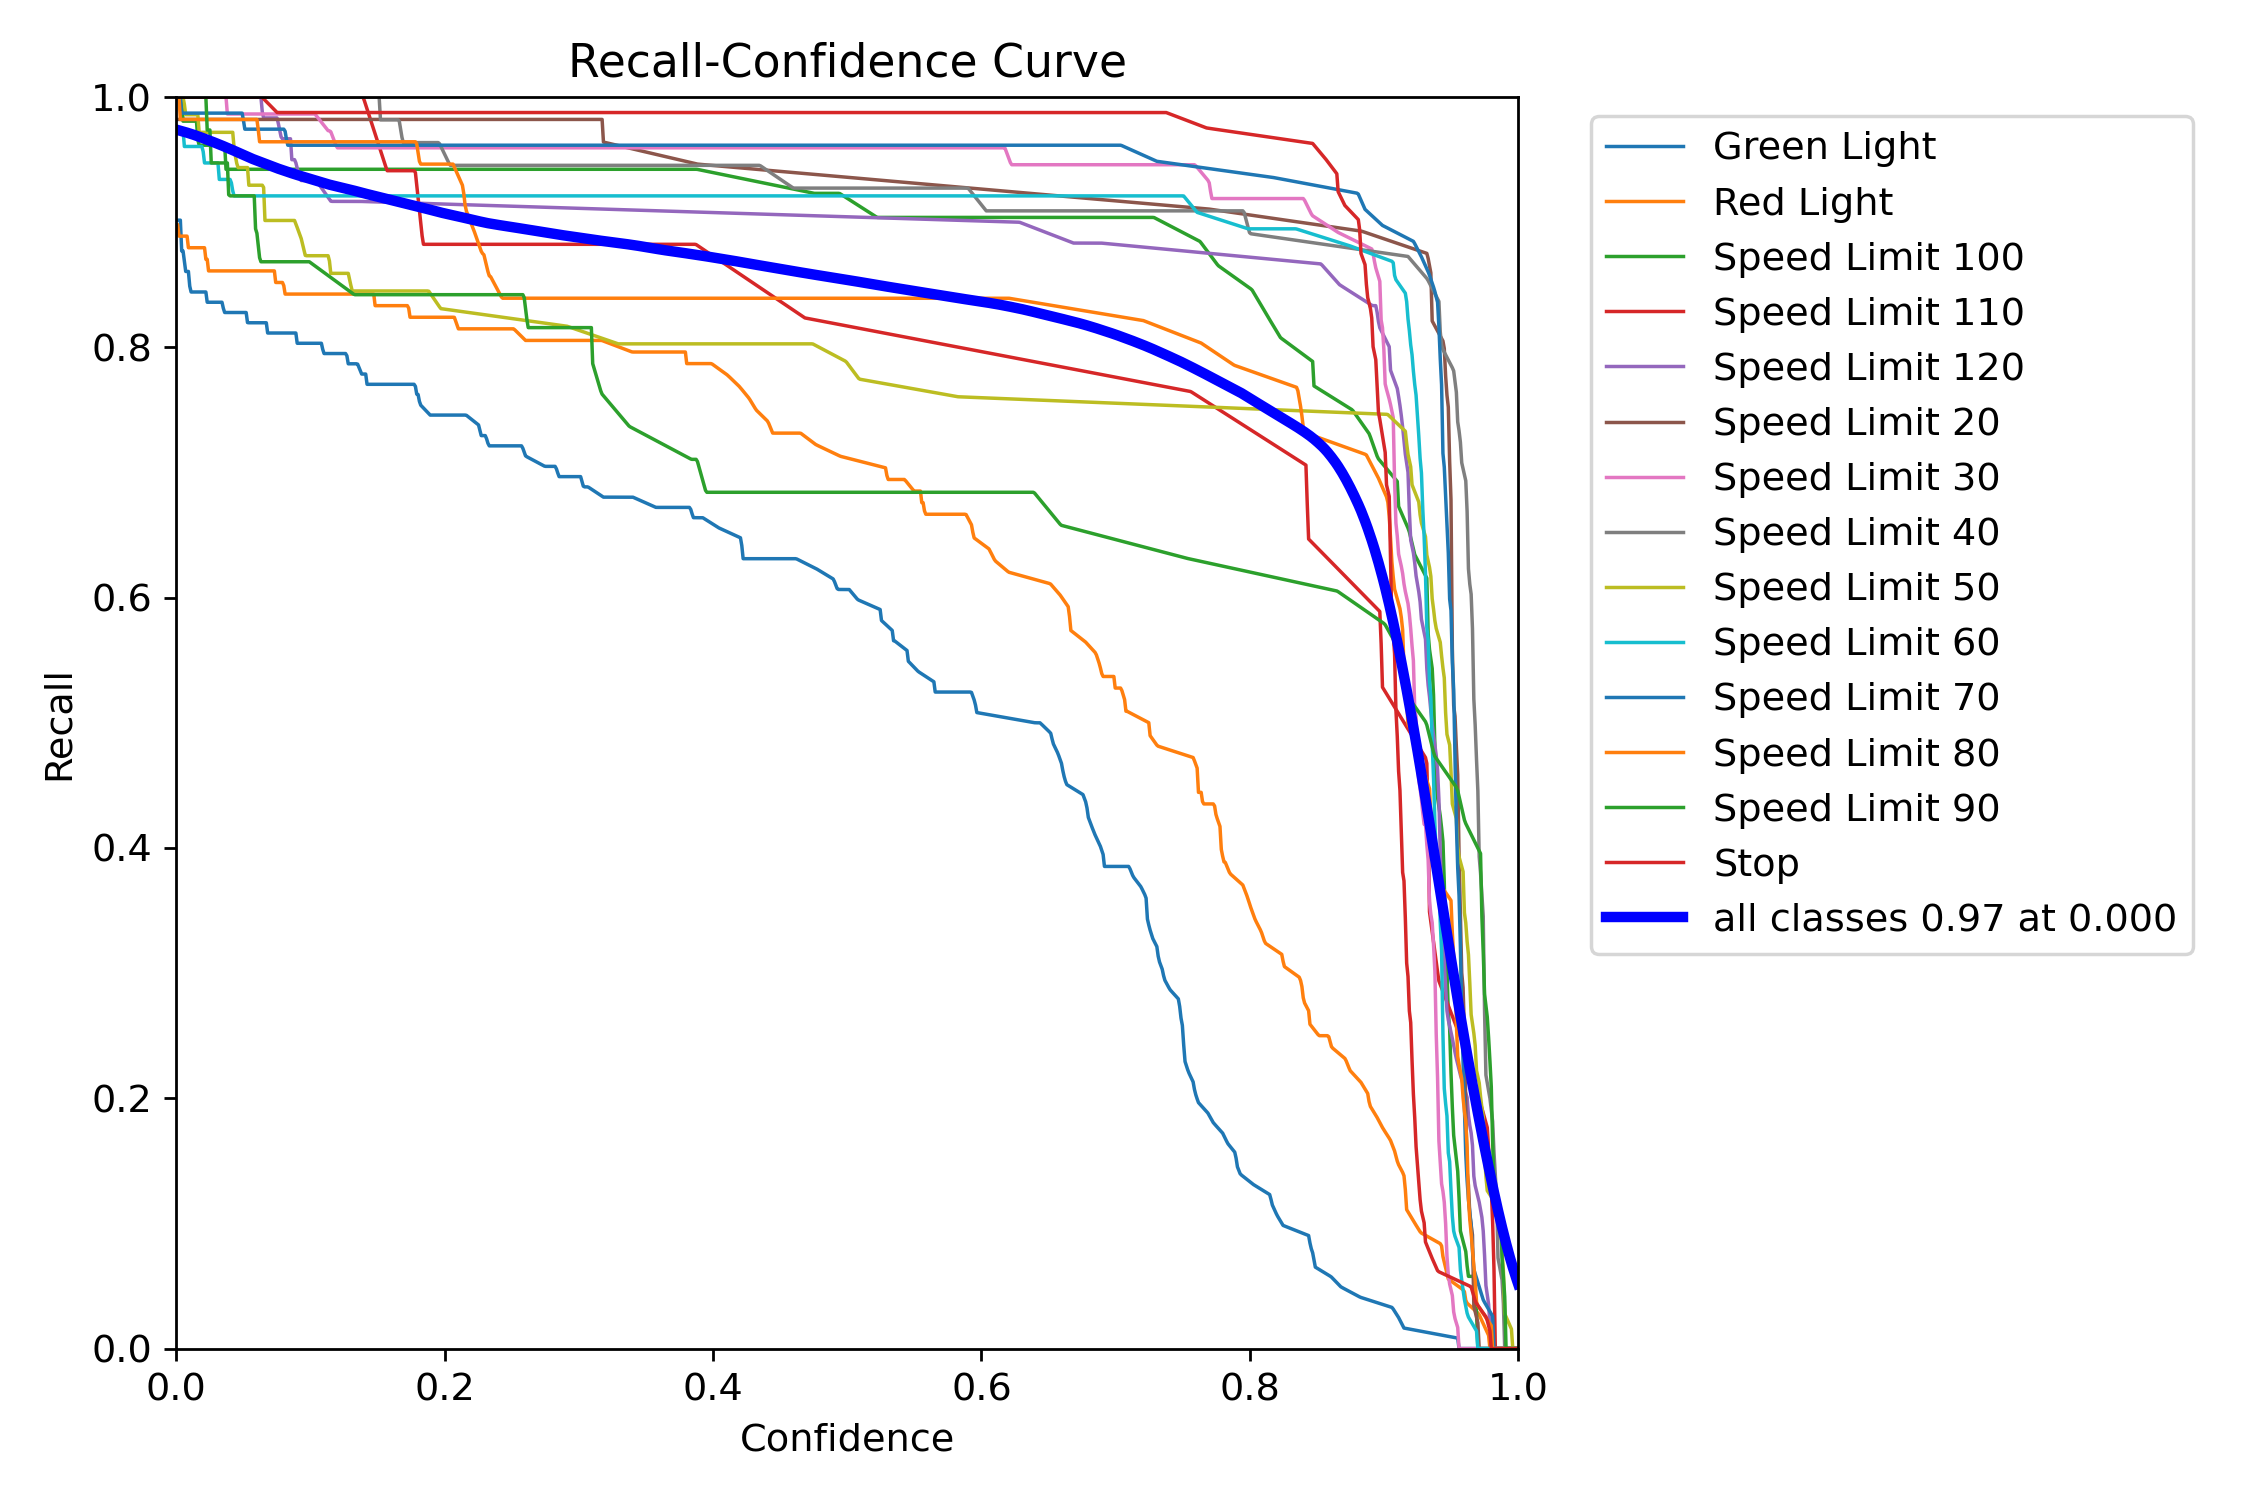

In [22]:
# Displays Recall Curve
r_path = os.path.join(val_path, "BoxR_curve.png")
if os.path.exists(r_path):
    display(Image(filename=r_path))
else:
    print("Missing file: BoxR_curve.png")

# Recall Curve Explanation

This plot shows the **Recall** of the YOLO model for each class at different confidence thresholds.

### Key Points:
- **X-axis (Confidence):** Model’s predicted confidence for each detection (0 = low, 1 = high).  
- **Y-axis (Recall):** Measures how many true positives the model correctly detects (higher = fewer missed detections).  
- **Colored Lines:** Each line represents a traffic sign class and shows how recall changes with confidence.  
- **Bold Blue Line ("all classes"):** Average recall across all classes.

### Interpretation:
- **Low confidence thresholds:** More predictions included → fewer missed detections → higher recall.  
- **High confidence thresholds:** Only very confident predictions included → some true positives may be missed → recall decreases.  
- **Peak of each line:** Indicates the confidence threshold where recall is optimal for that class.

**Summary:** The Recall curve helps identify the **best confidence threshold** for detecting most true positives with the YOLO model.

# Precision-Recall Curve

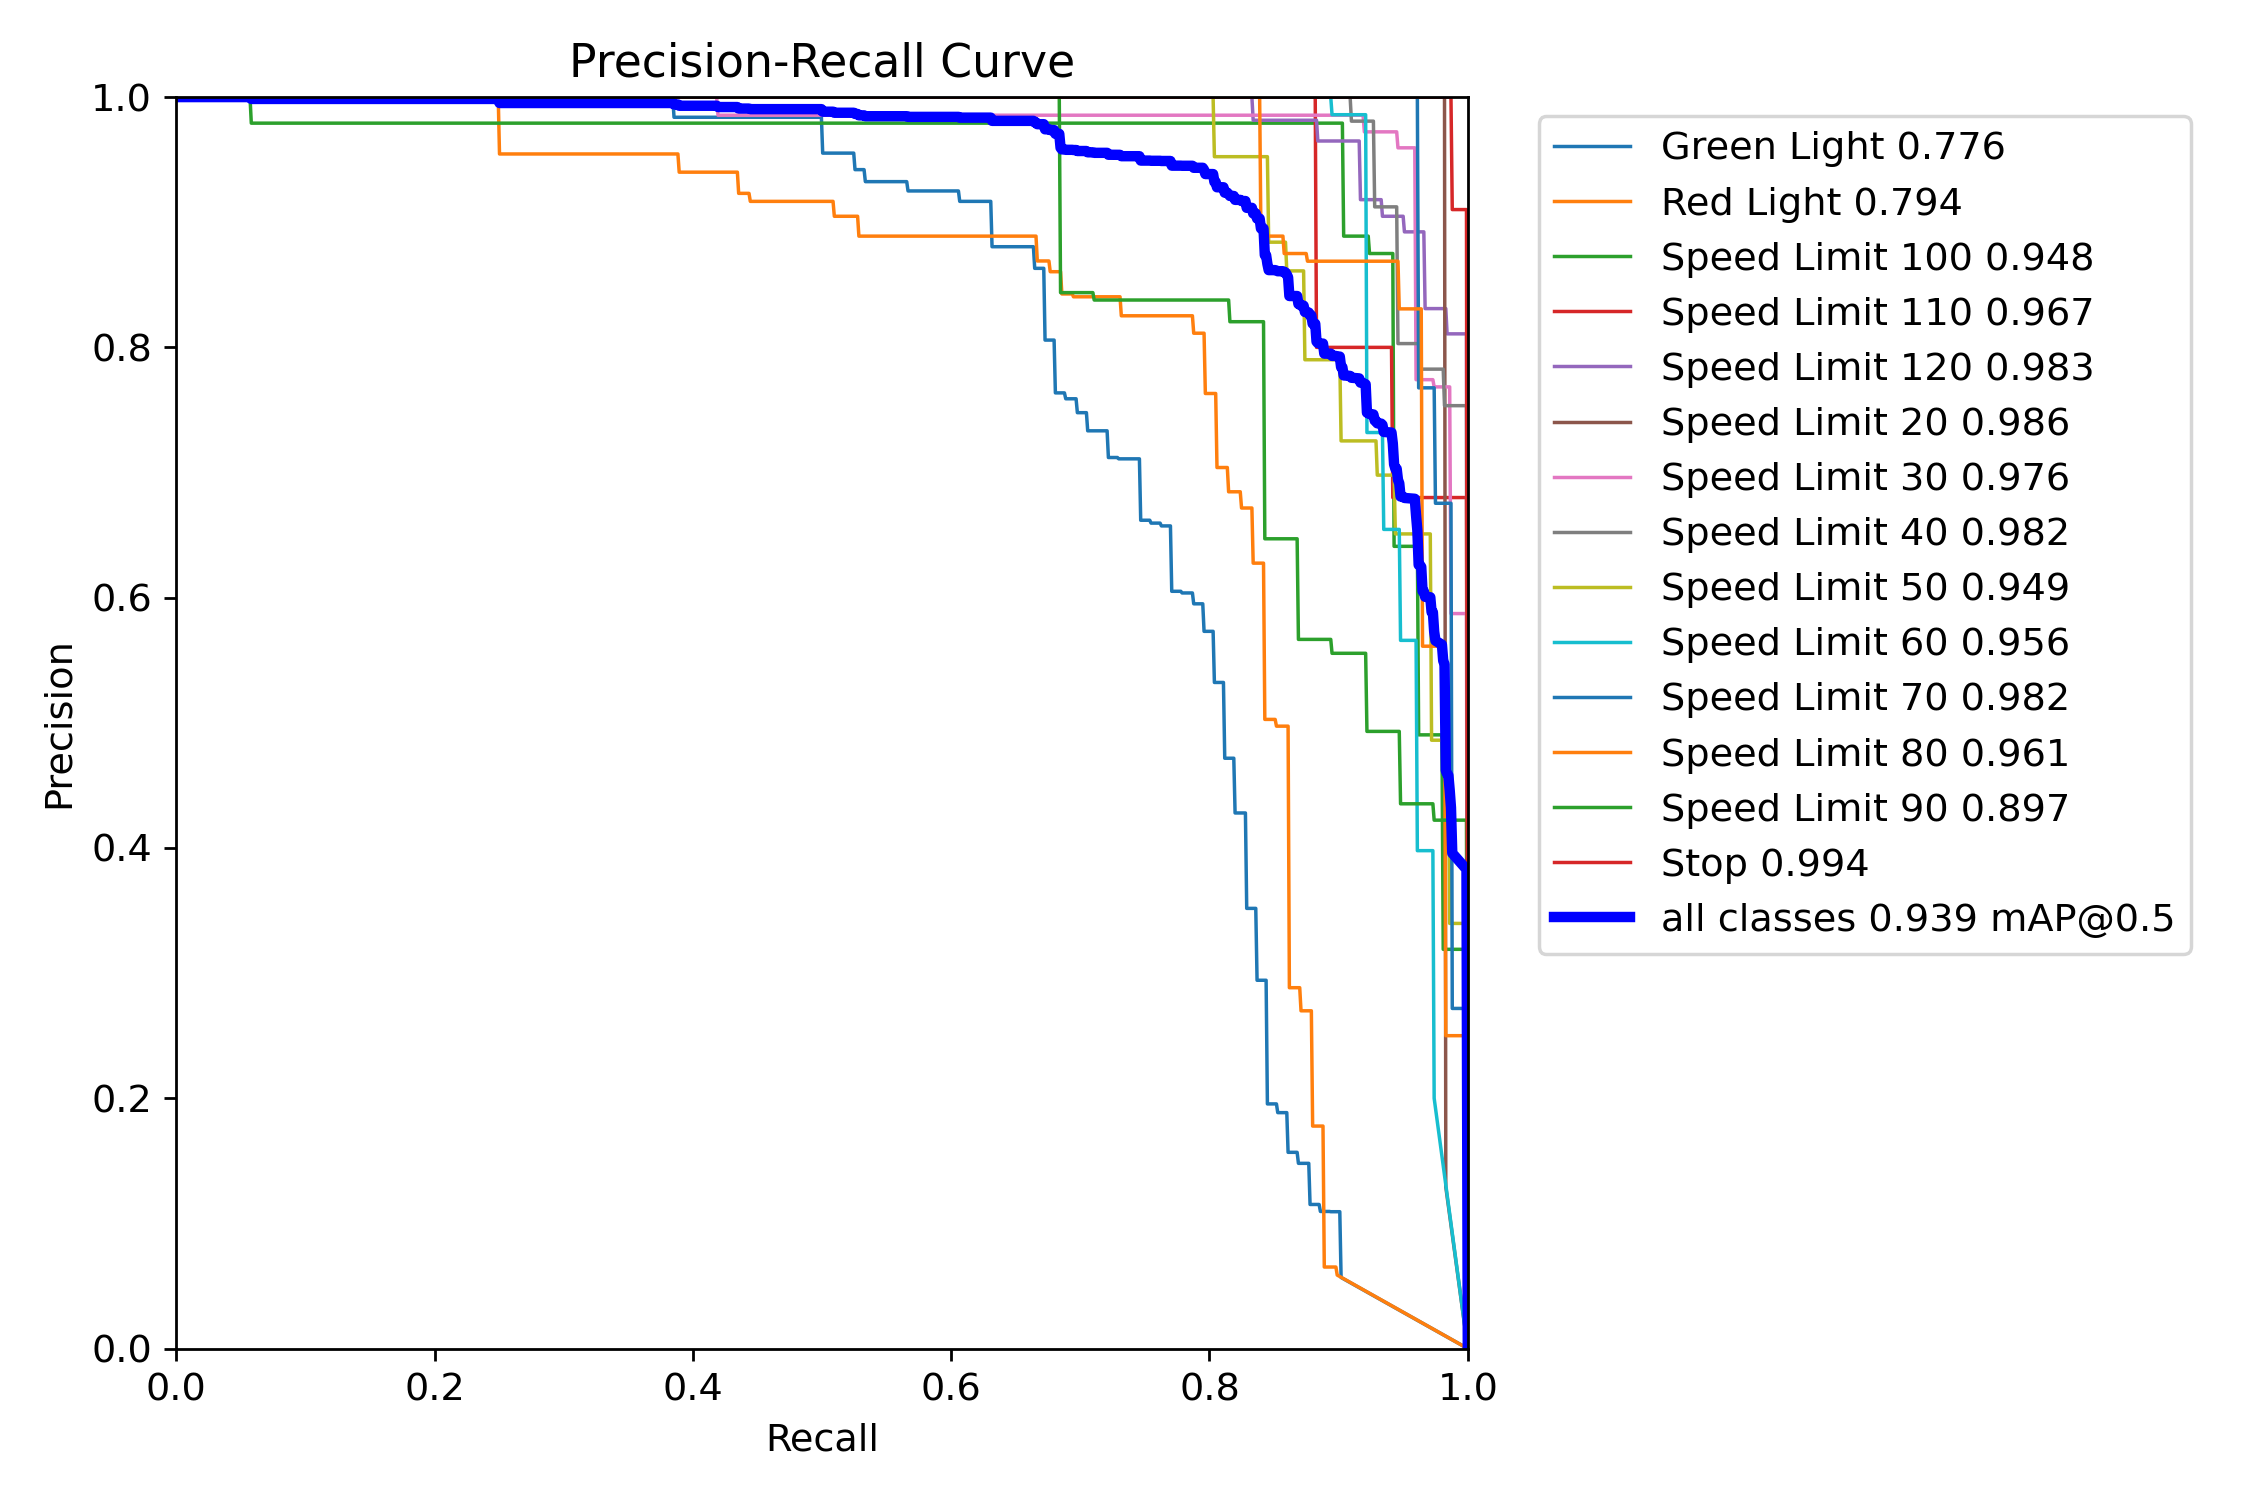

In [65]:
# Display Precision-Recall Curve
pr_path = os.path.join(val_path, "BoxPR_curve.png")
if os.path.exists(pr_path):
    display(Image(filename=pr_path))
else:
    print("Missing file: BoxPR_curve.png")

# Precision-Recall Curve Explanation

This plot shows the **relationship between Precision and Recall** for each traffic sign class in the YOLO model.

### Key Points:
- **X-axis (Recall):** Fraction of true positives correctly detected (0–1).  
- **Y-axis (Precision):** Accuracy of positive predictions (0–1).  
- **Colored Lines:** Each line represents a traffic sign class, showing how precision varies with recall.  
- **Bold Blue Line ("all classes"):** Average precision across all classes.

### Interpretation:
- **High precision & high recall:** Ideal scenario – model predicts accurately and detects most true positives.  
- **High recall, low precision:** Model detects most objects but includes many false positives.  
- **High precision, low recall:** Model predictions are accurate but many true positives are missed.  
- **Curve shape:** Helps identify the confidence thresholds that balance precision and recall for each class.

**Summary:** The Precision-Recall curve is used to evaluate the **trade-off between precision and recall** and to select optimal confidence thresholds for the YOLO model.

# Confusion Matrix

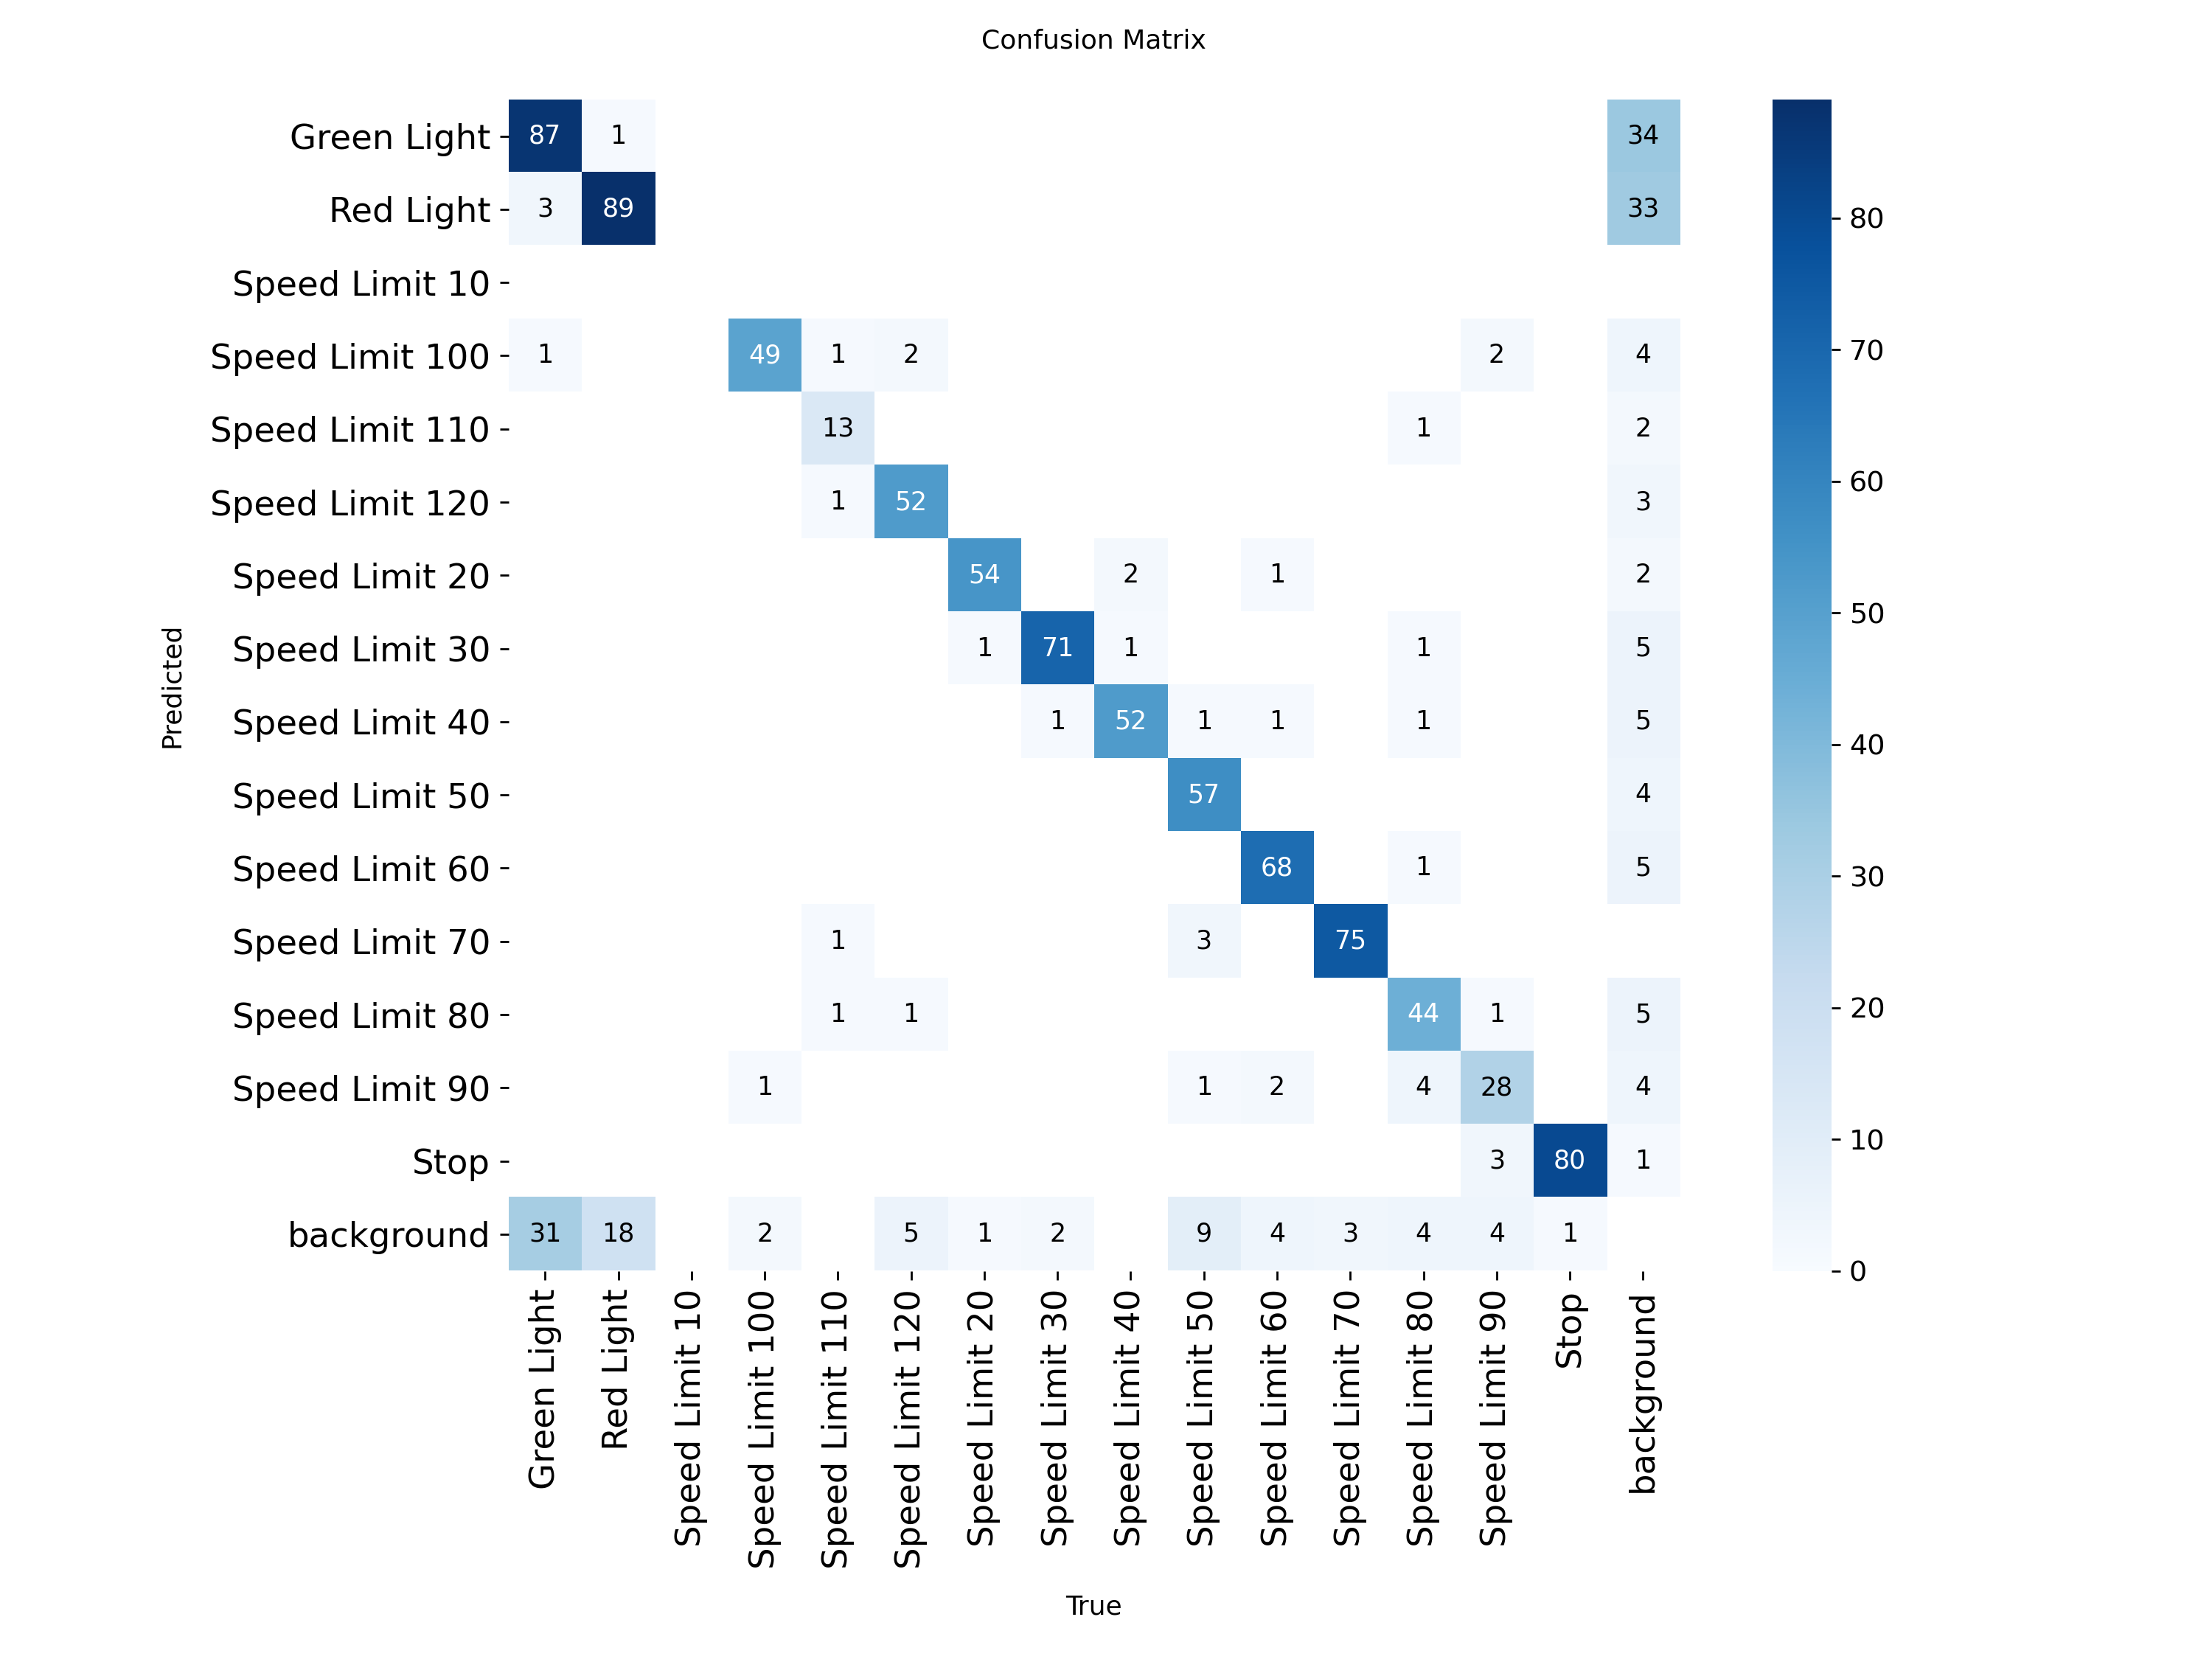

In [66]:
# Display Confusion Matrix
cm_path = os.path.join(val_path, "confusion_matrix.png")
if os.path.exists(cm_path):
    display(Image(filename=cm_path))
else:
    print("Missing file: confusion_matrix.png")

# Confusion Matrix Explanation

This plot shows the **Confusion Matrix** for the YOLO model predictions across all traffic sign classes.

### Key Points:
- **Rows:** Actual classes (ground truth).  
- **Columns:** Predicted classes by the model.  
- **Diagonal values:** Number of correct predictions for each class.  
- **Off-diagonal values:** Number of misclassifications (errors) between classes.  
- **Color intensity:** Higher values are usually darker/brighter depending on the colormap.

### Interpretation:
- **High values on the diagonal:** Model correctly predicts most instances → good performance.  
- **High values off-diagonal:** Model confuses certain classes → needs improvement.  
- **Helps identify:** Which classes are being misclassified and may require more training data or tuning.

**Summary:** The Confusion Matrix provides a detailed view of the model’s **class-wise performance** and highlights areas where the model struggles.

# Normalized Confusion Matrix

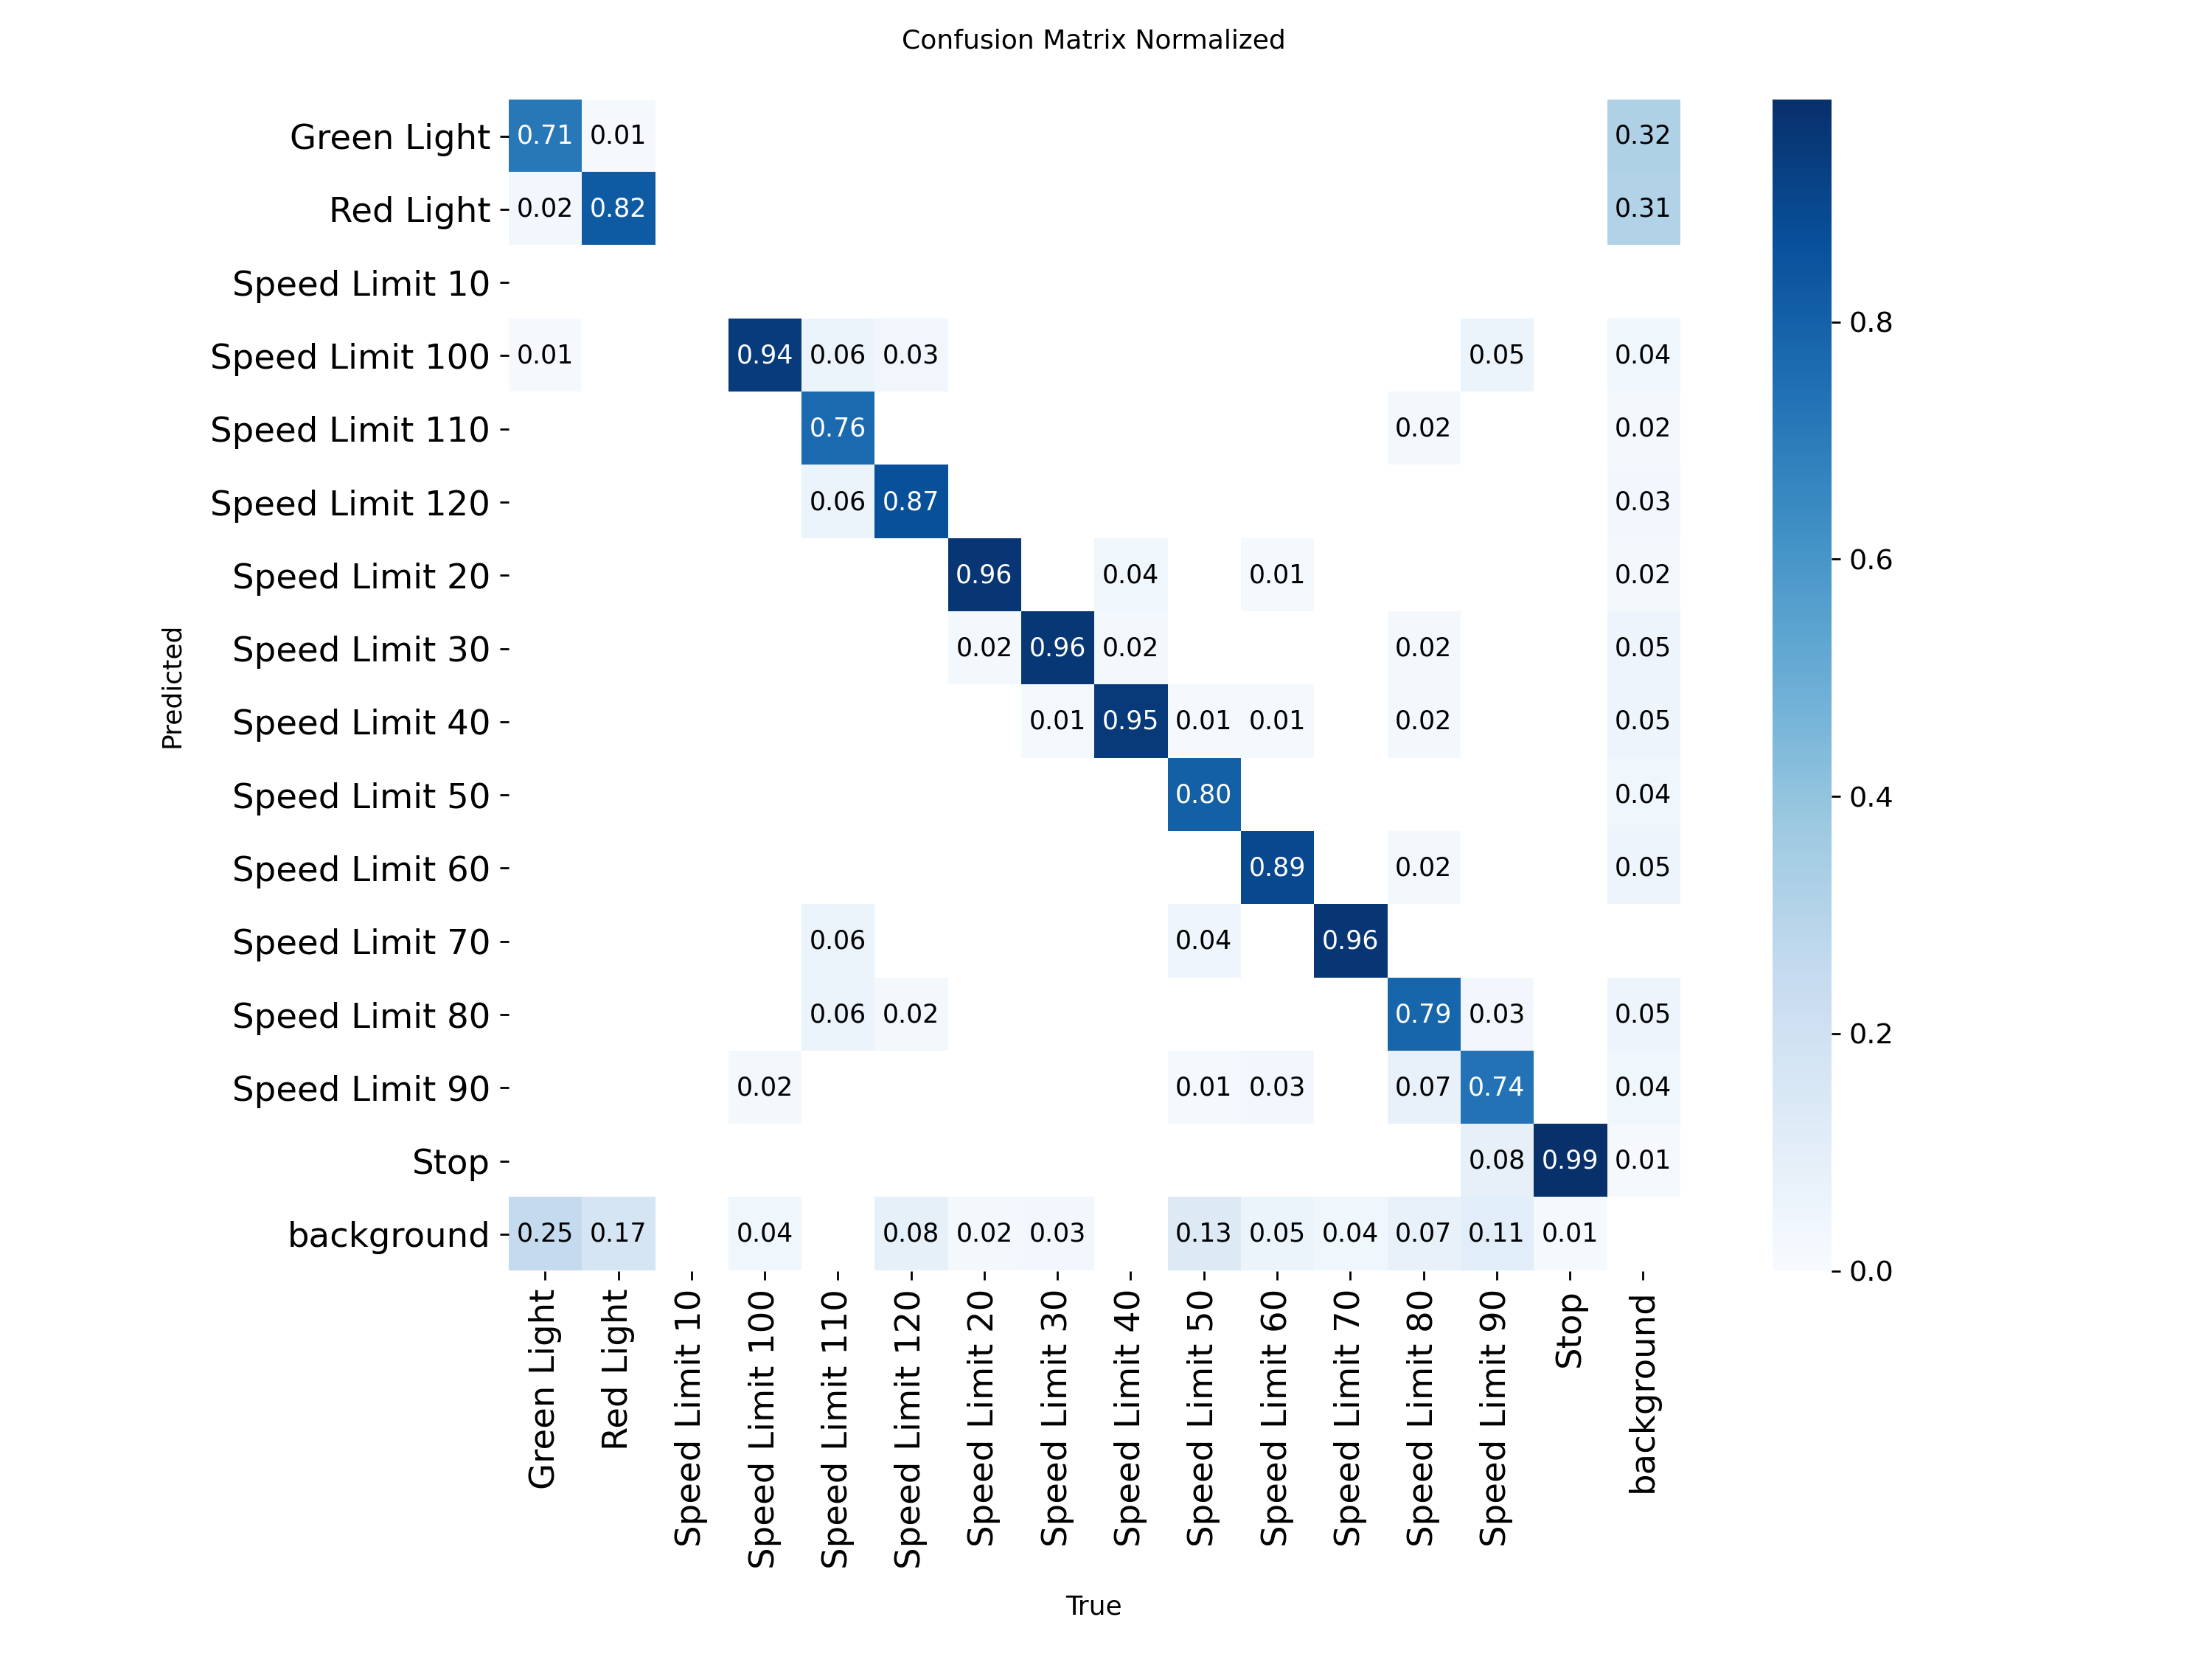

In [67]:
# Display Normalized Confusion Matrix
cmn_path = os.path.join(val_path, "confusion_matrix_normalized.png")
if os.path.exists(cmn_path):
    display(Image(filename=cmn_path))
else:
    print("Missing file: confusion_matrix_normalized.png")

# Normalized Confusion Matrix Explanation

This plot shows the **Normalized Confusion Matrix** for the YOLO model predictions across all traffic sign classes.

### Key Points:
- **Rows:** Actual classes (ground truth).  
- **Columns:** Predicted classes by the model.  
- **Values:** Each cell shows the proportion of predictions relative to the total instances of that actual class (0–1).  
- **Diagonal values:** Fraction of correctly predicted instances for each class.  
- **Off-diagonal values:** Fraction of misclassified instances.

### Interpretation:
- **Diagonal values close to 1:** Class is predicted accurately.  
- **High off-diagonal values:** Indicates confusion between specific classes.  
- **Normalization:** Makes it easier to compare performance across classes with different sample counts.

**Summary:** The Normalized Confusion Matrix highlights **class-wise prediction accuracy proportionally**, helping to identify which classes the model struggles with regardless of class frequency.

# Validation Batch Predictions

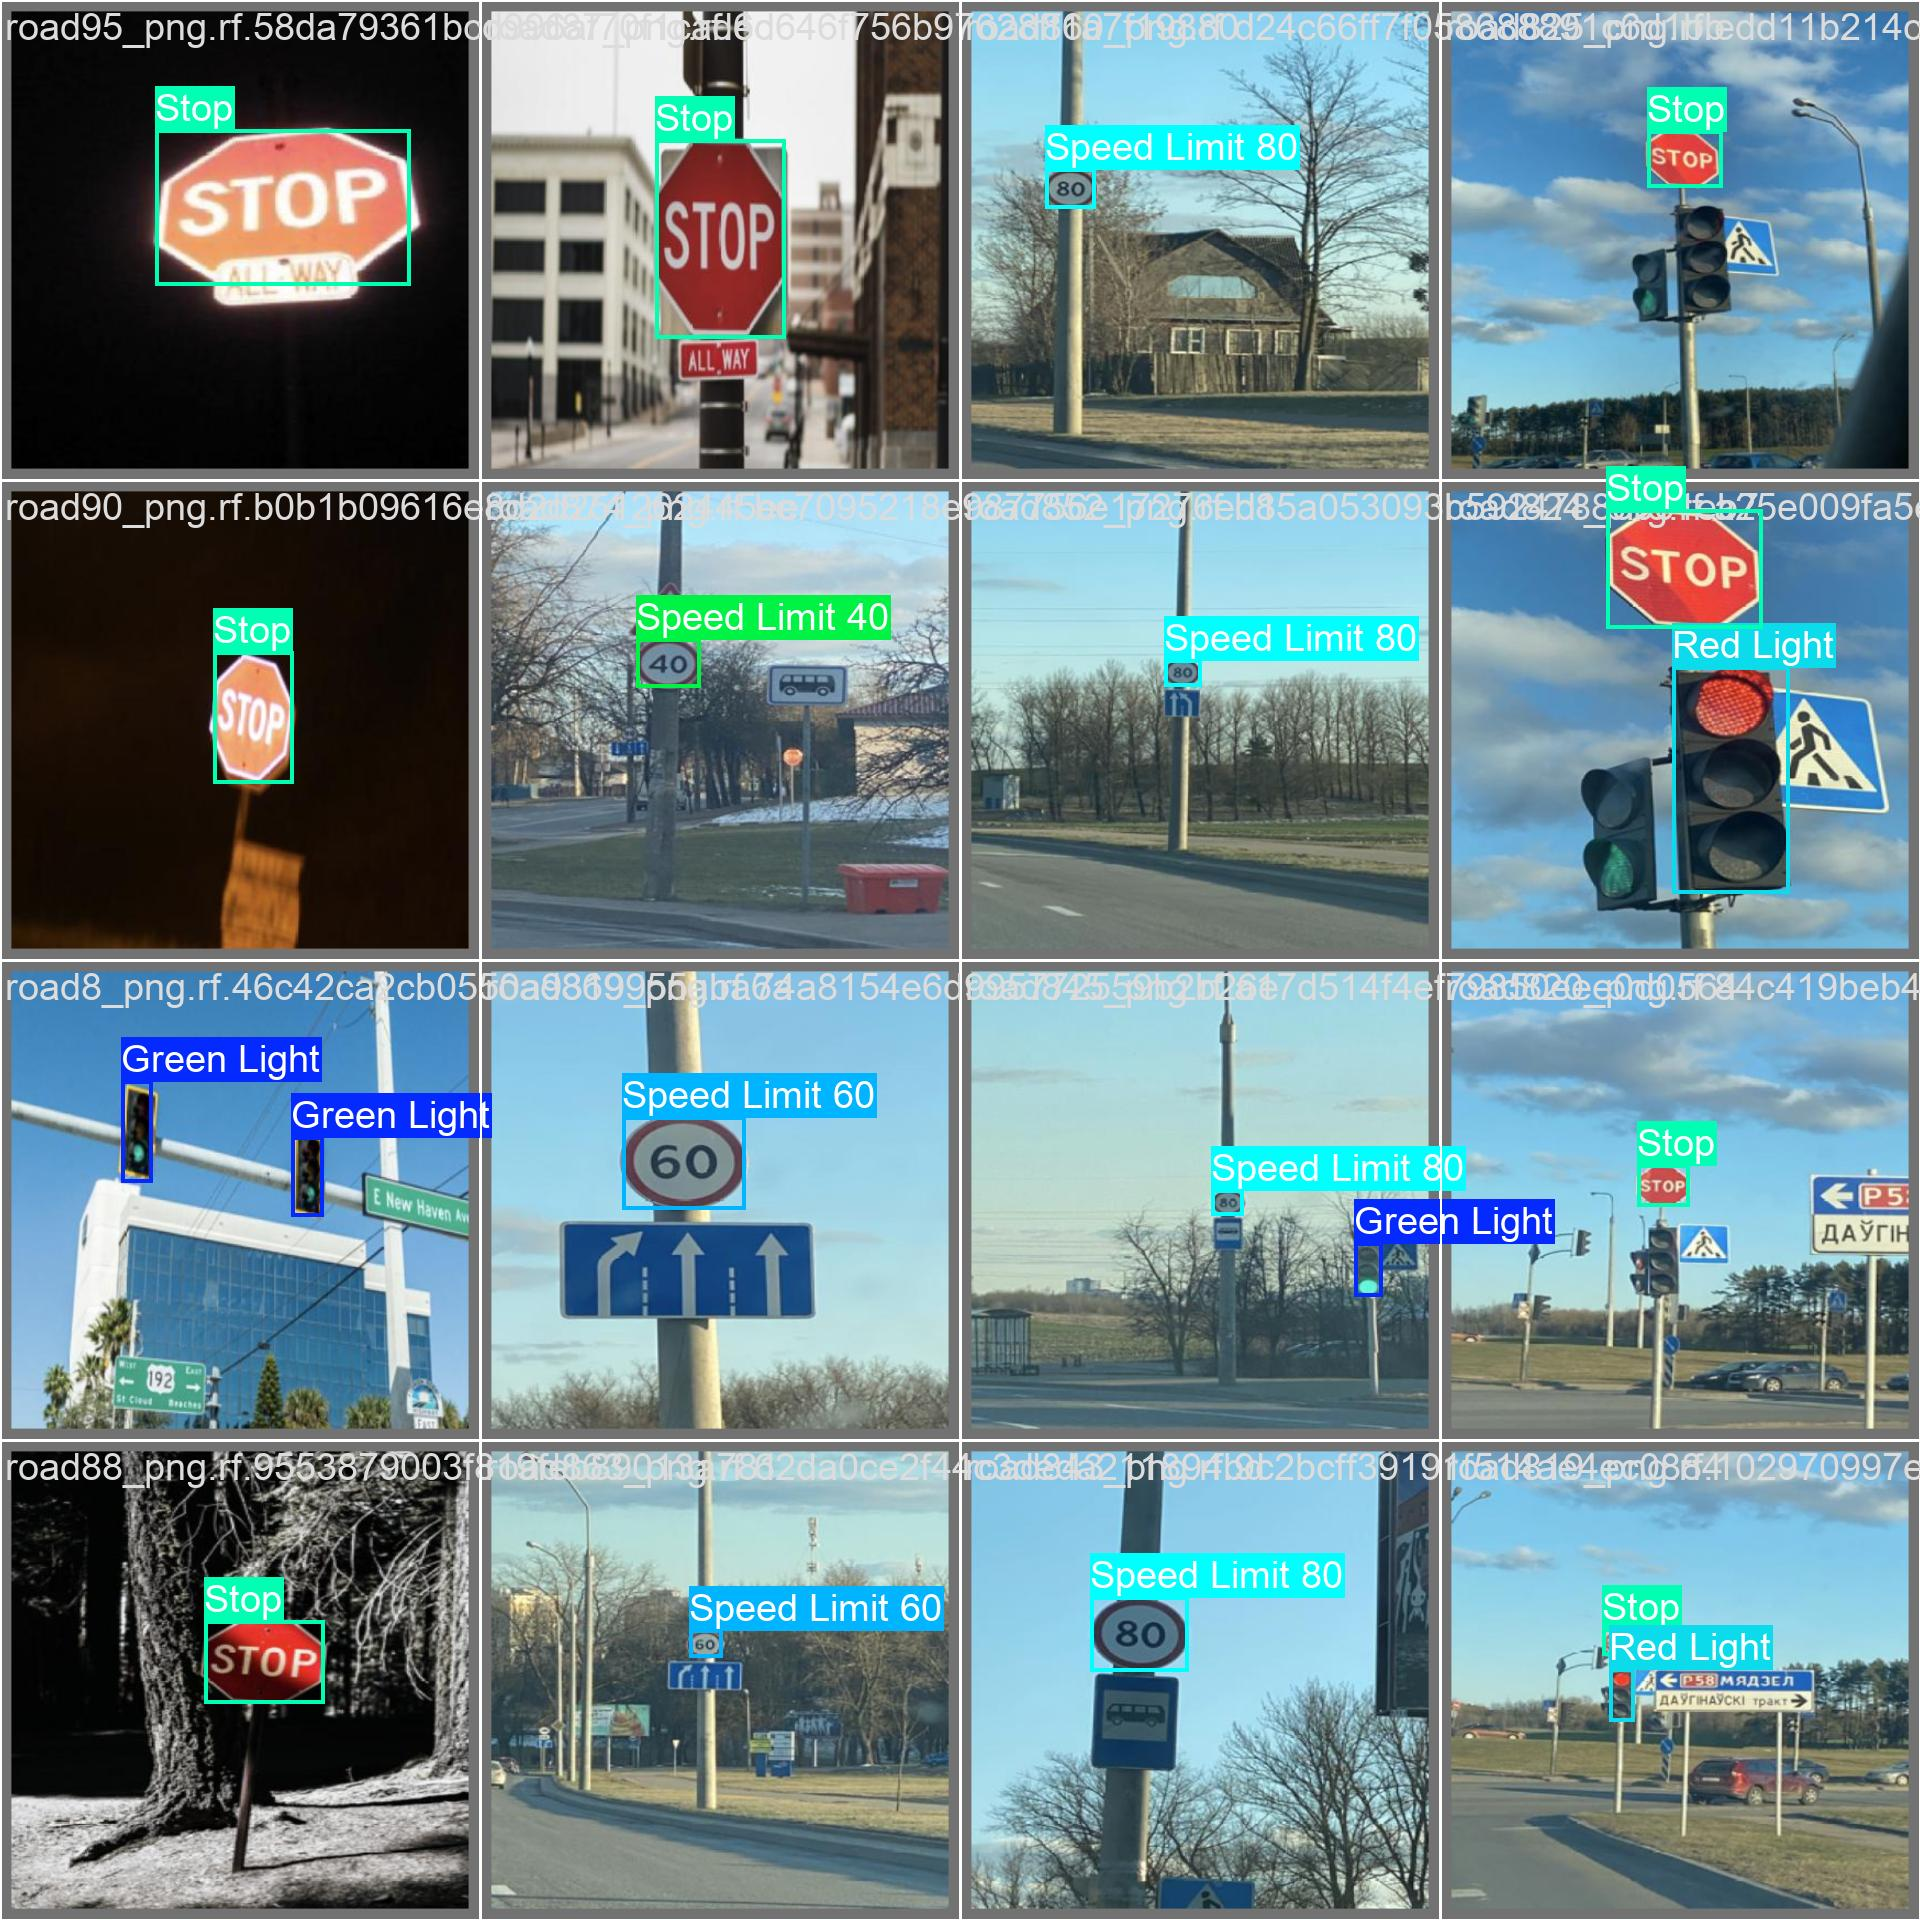

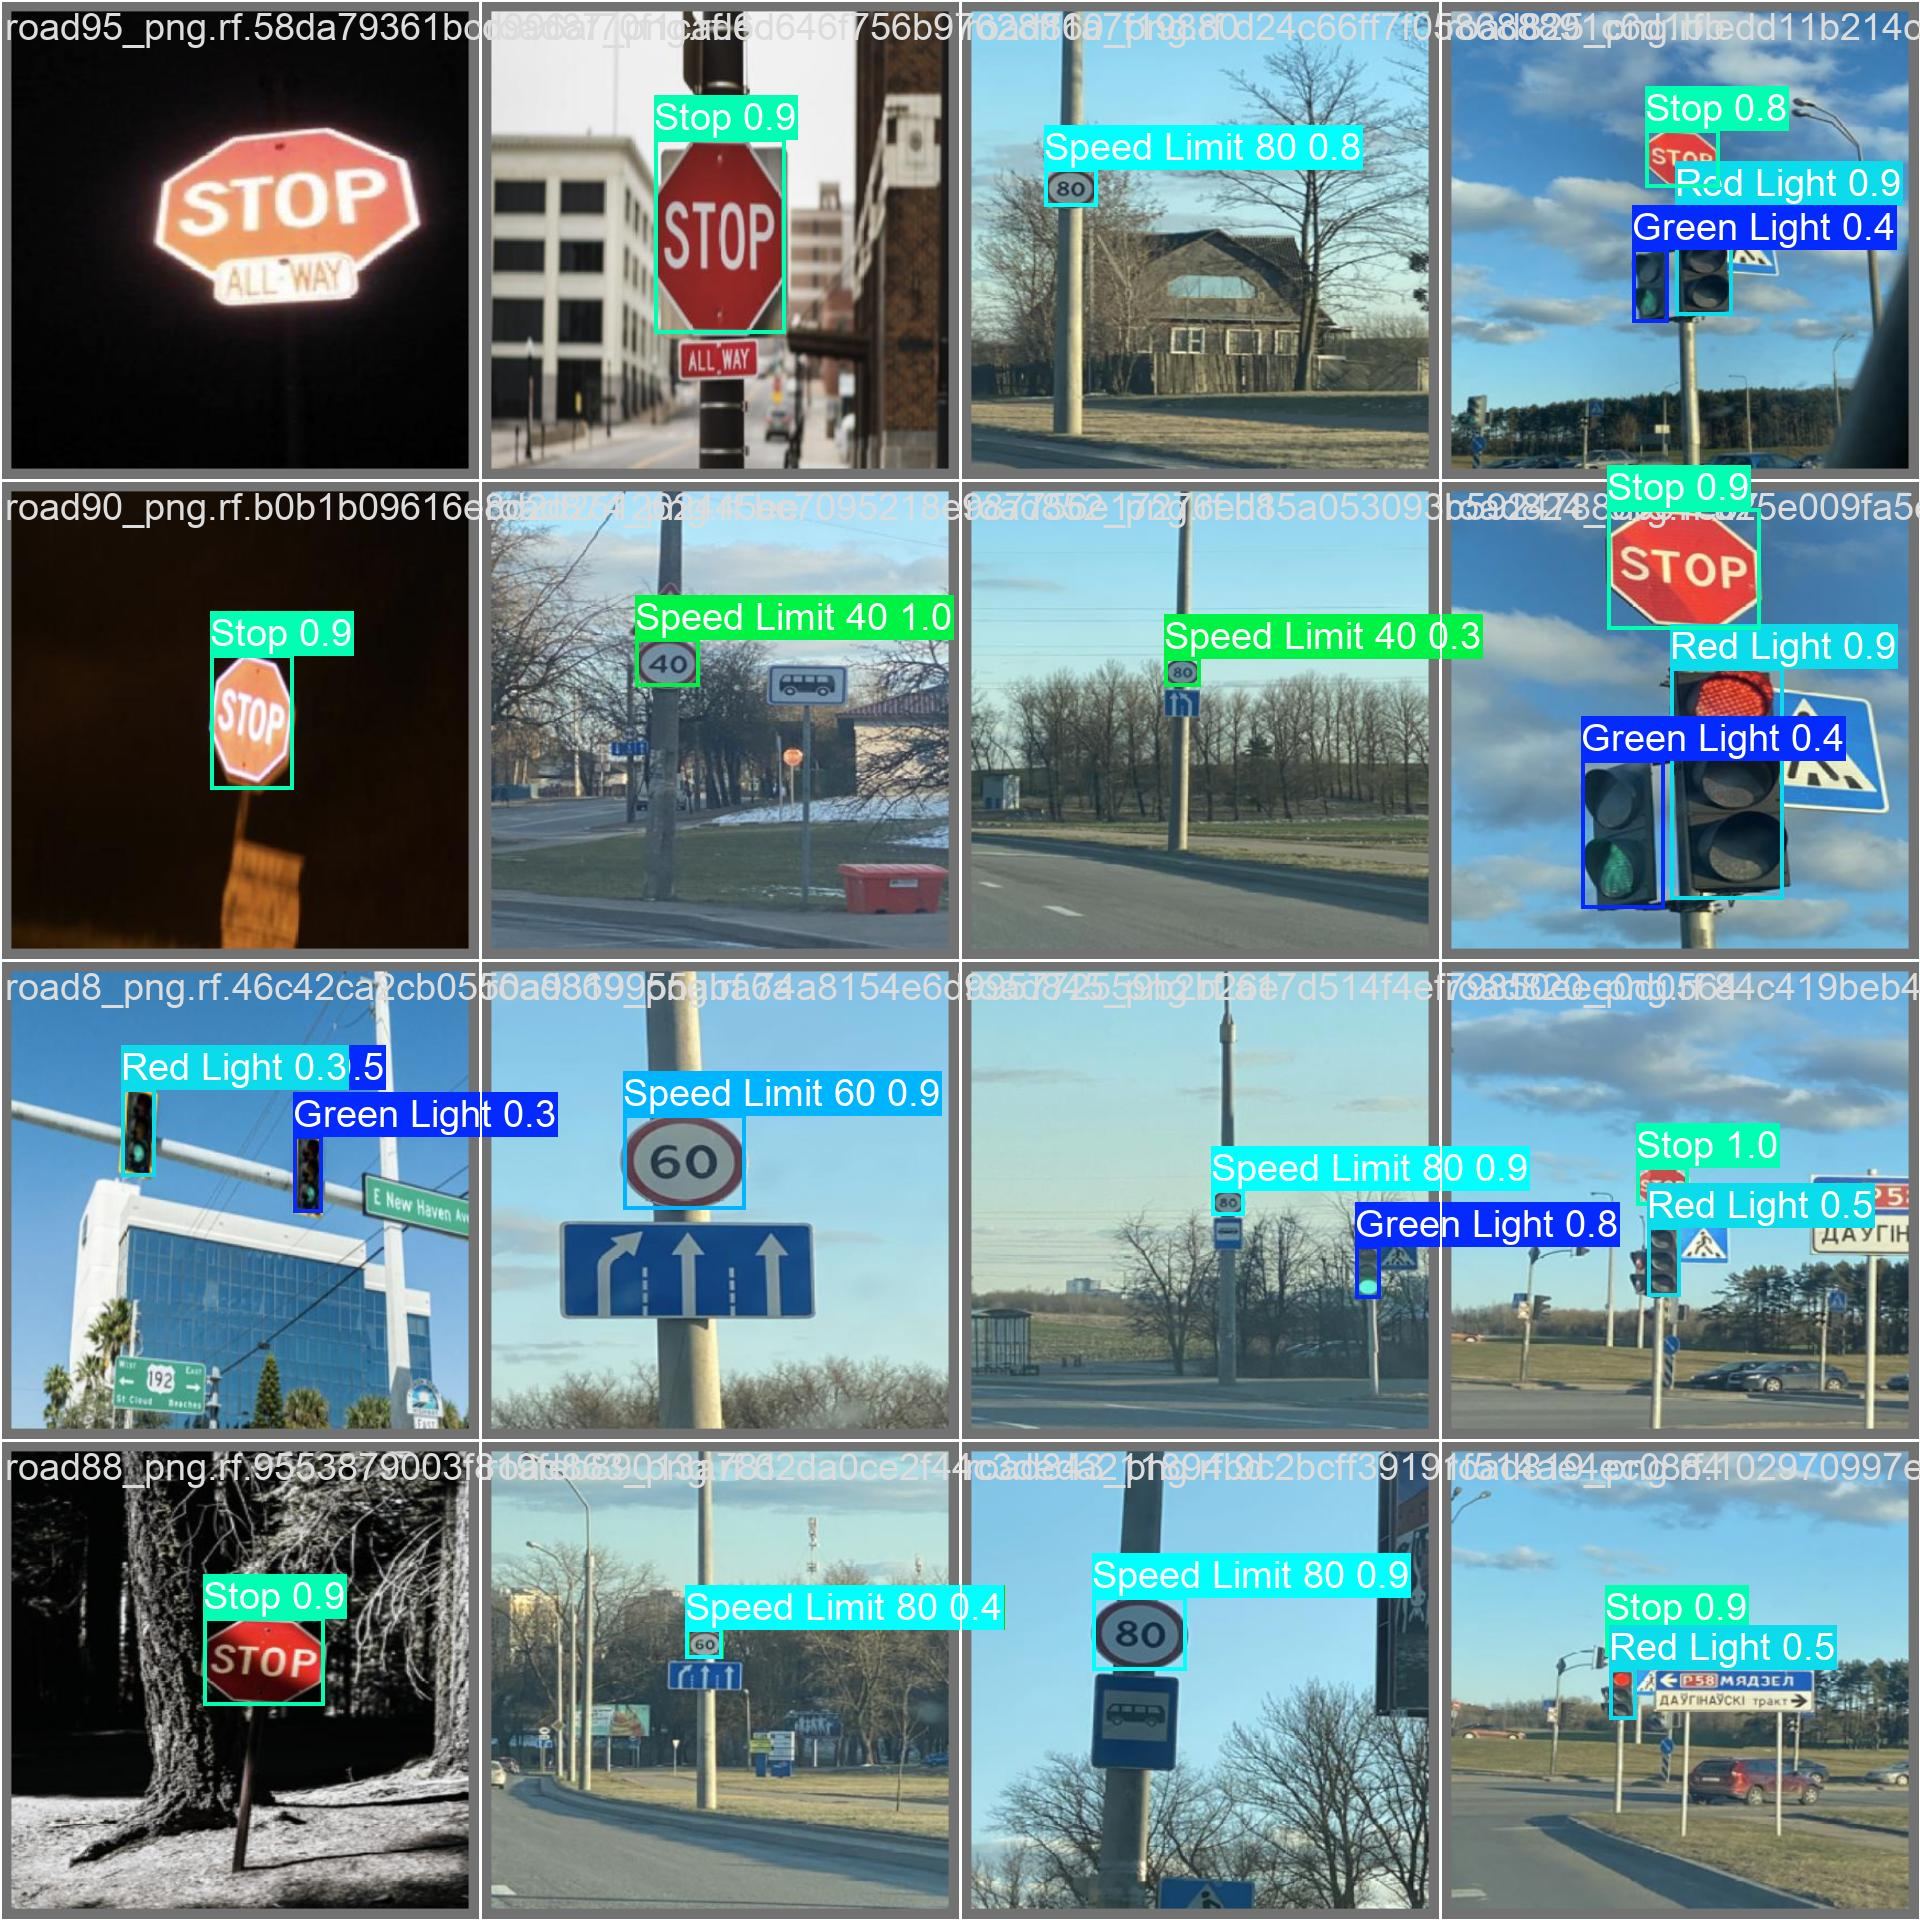

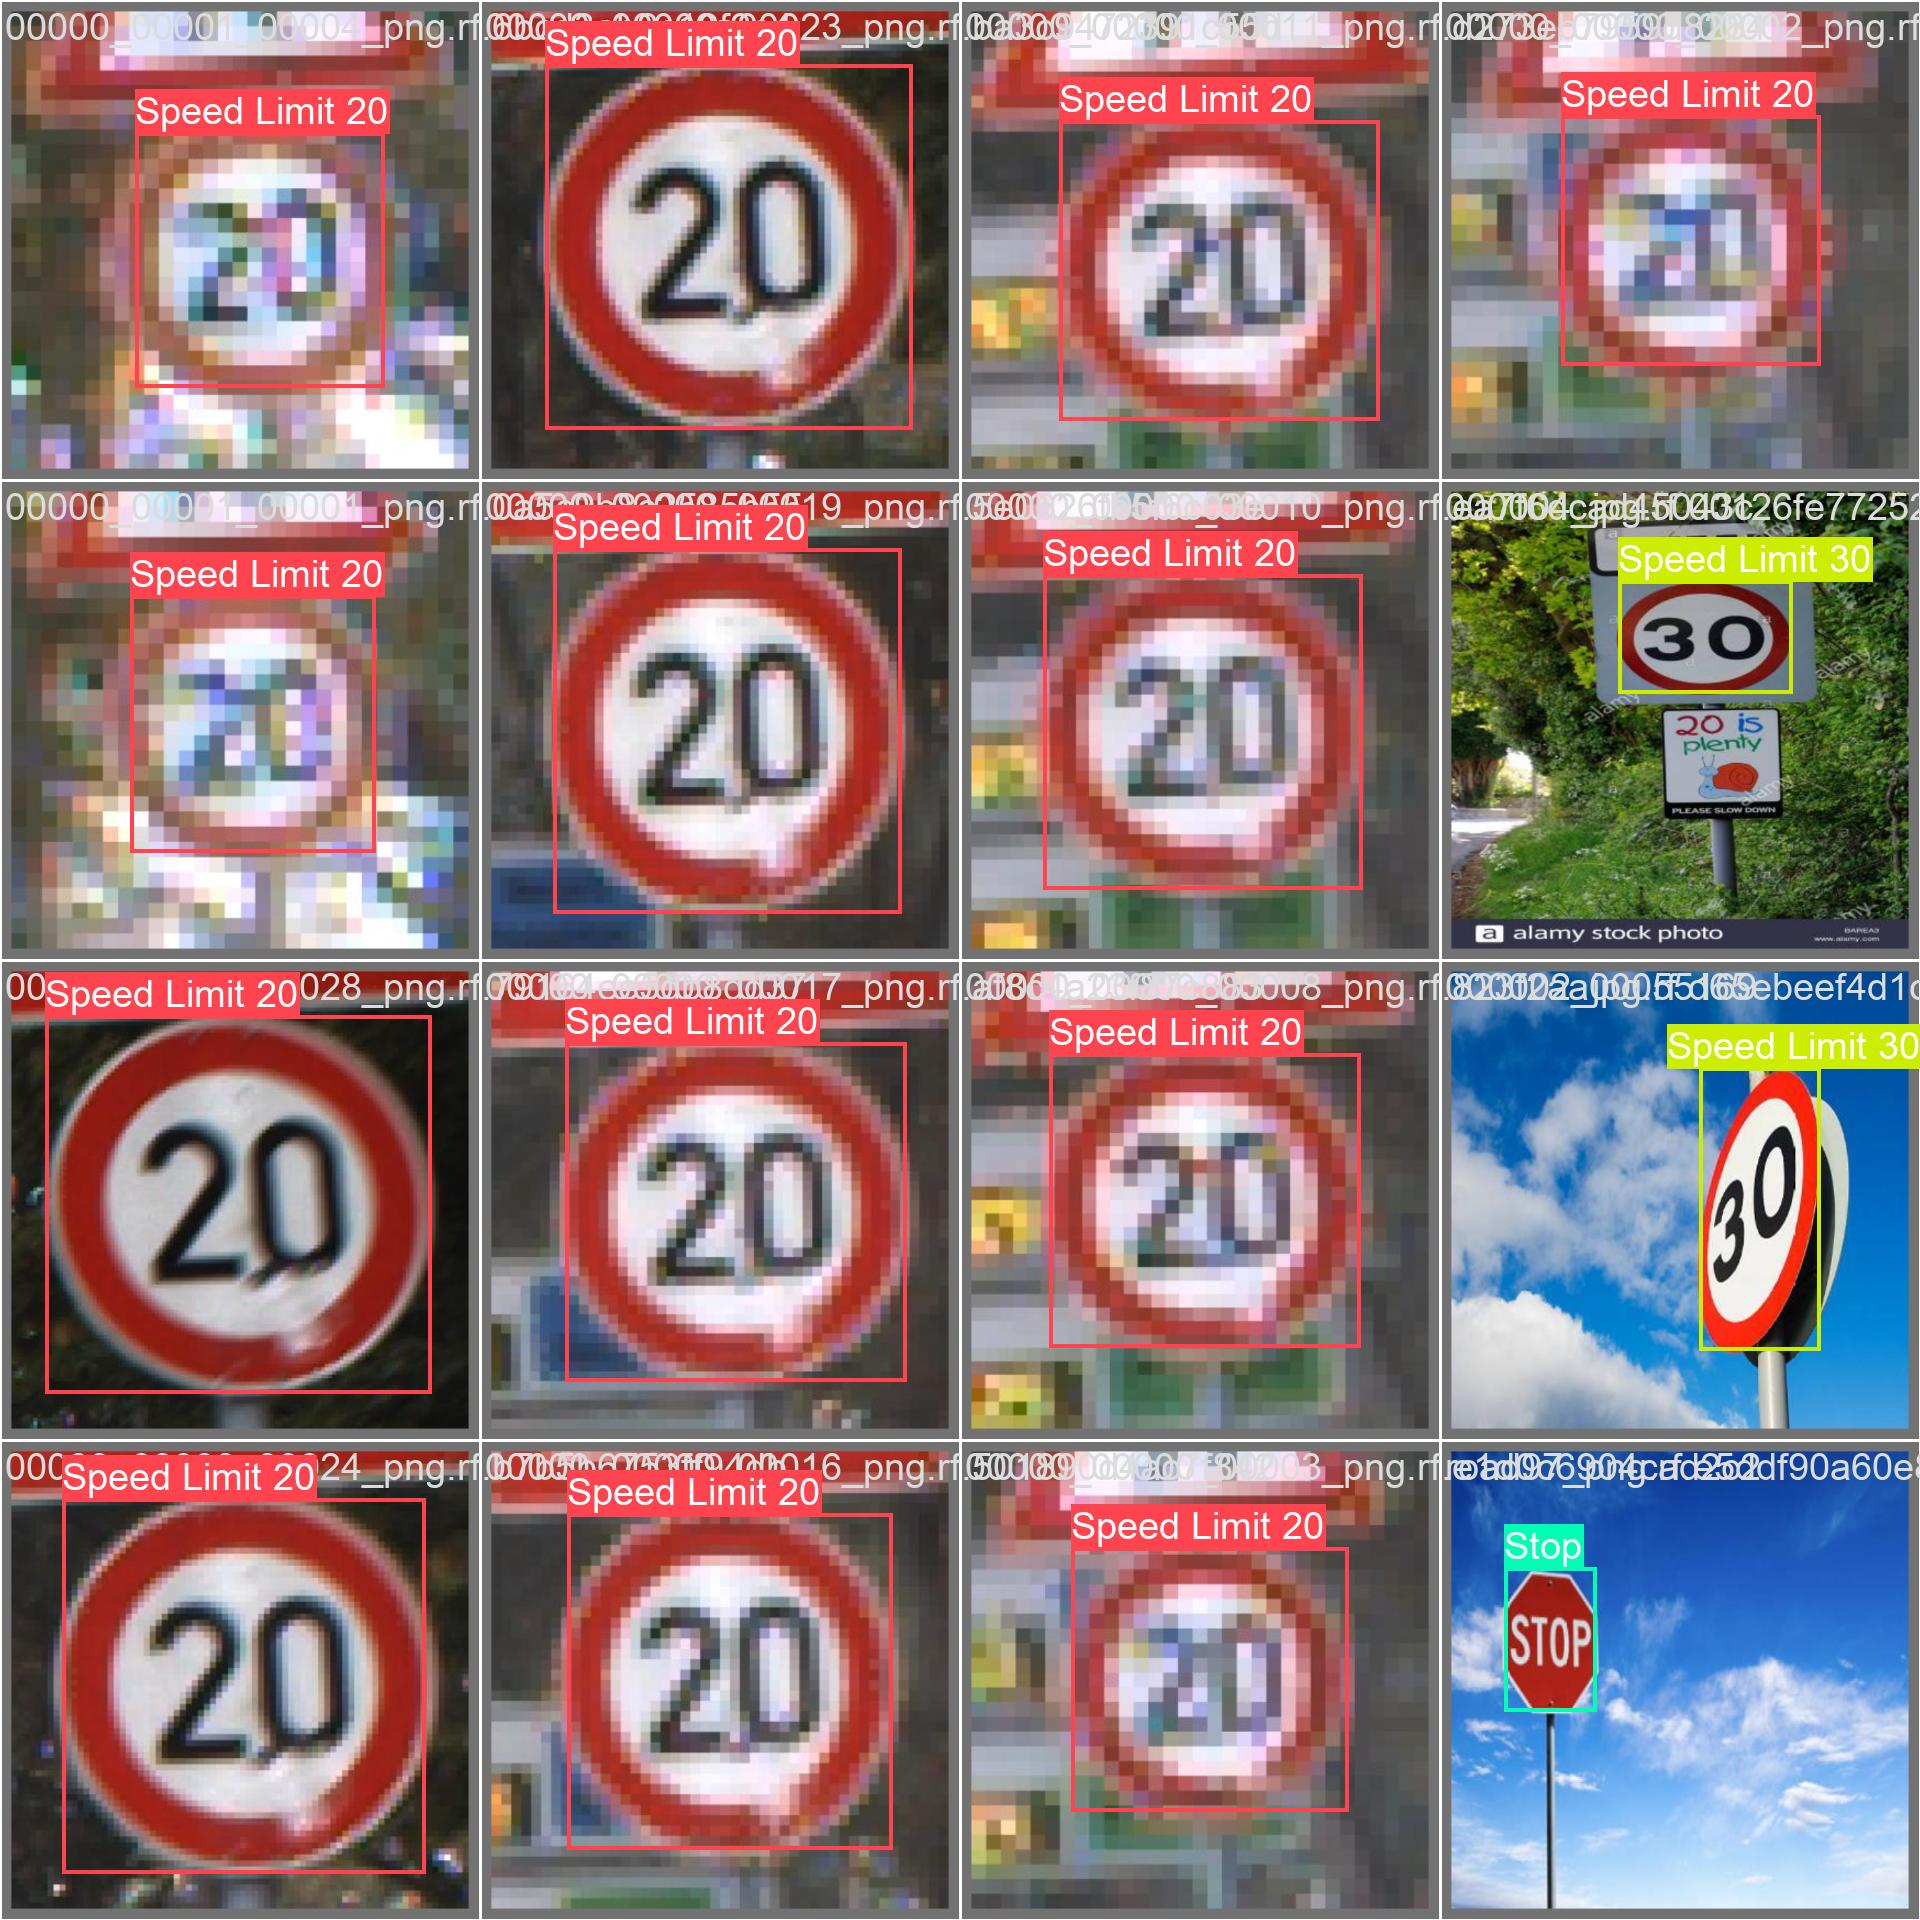

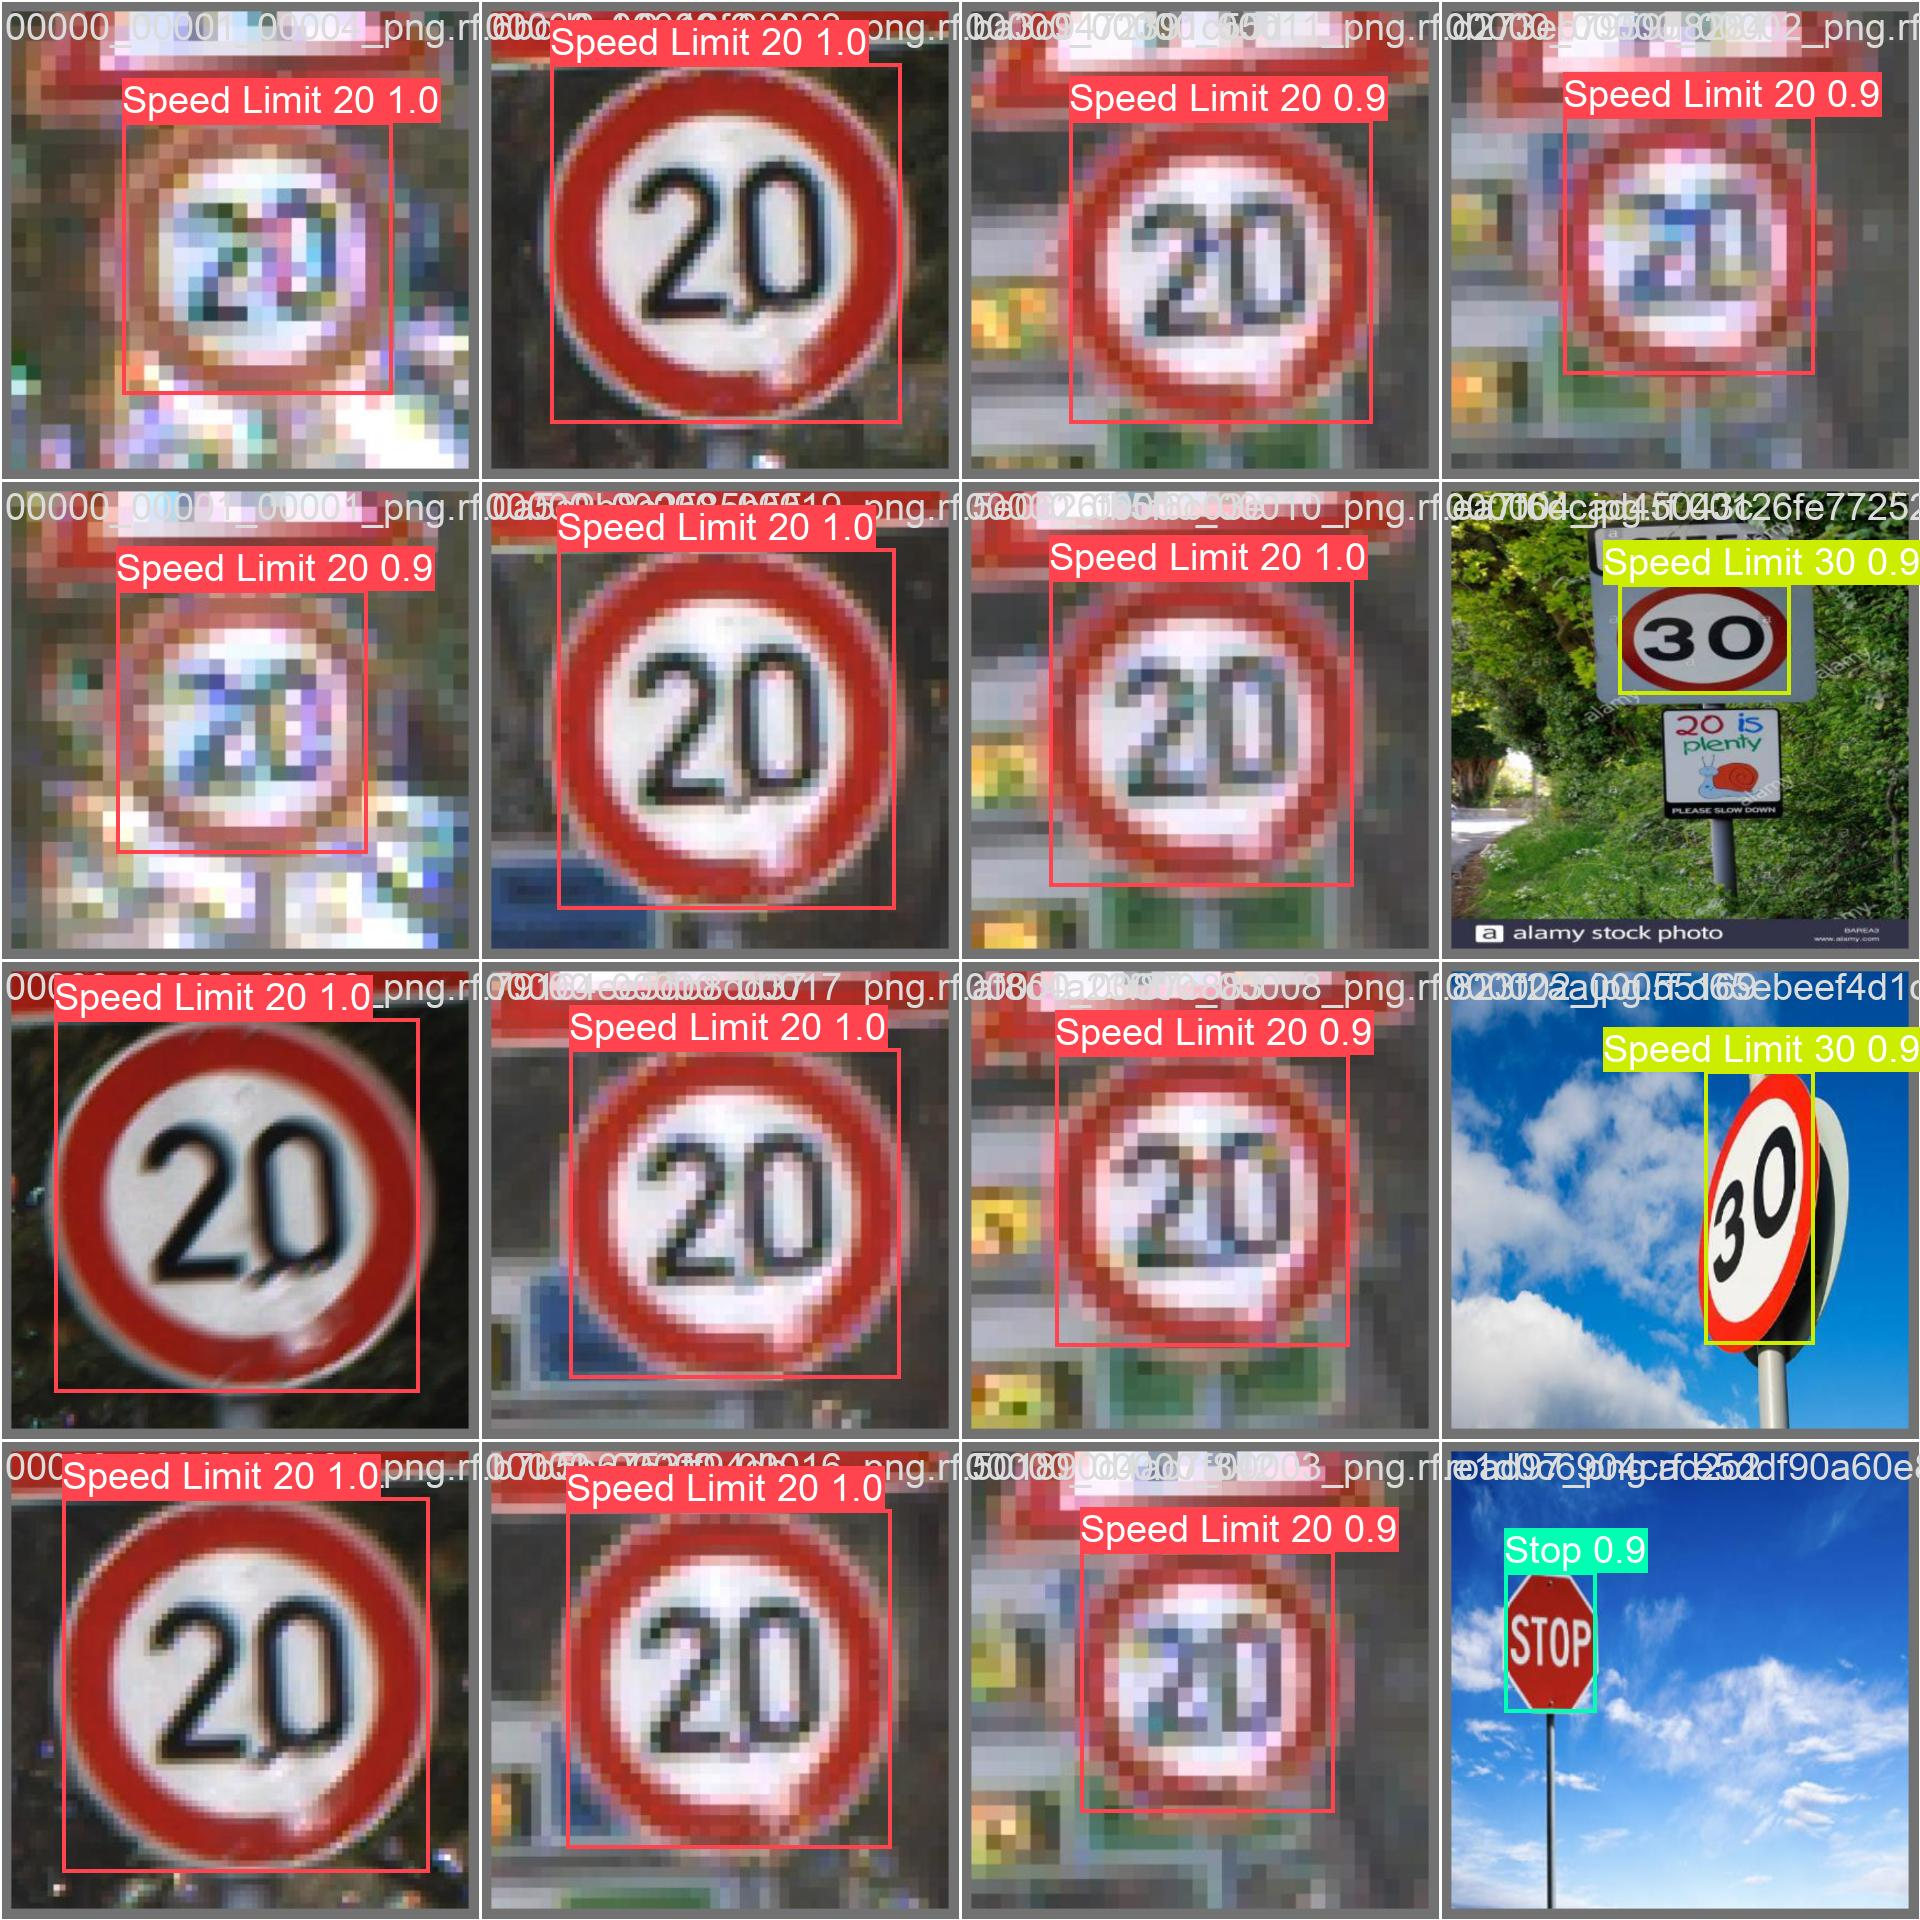

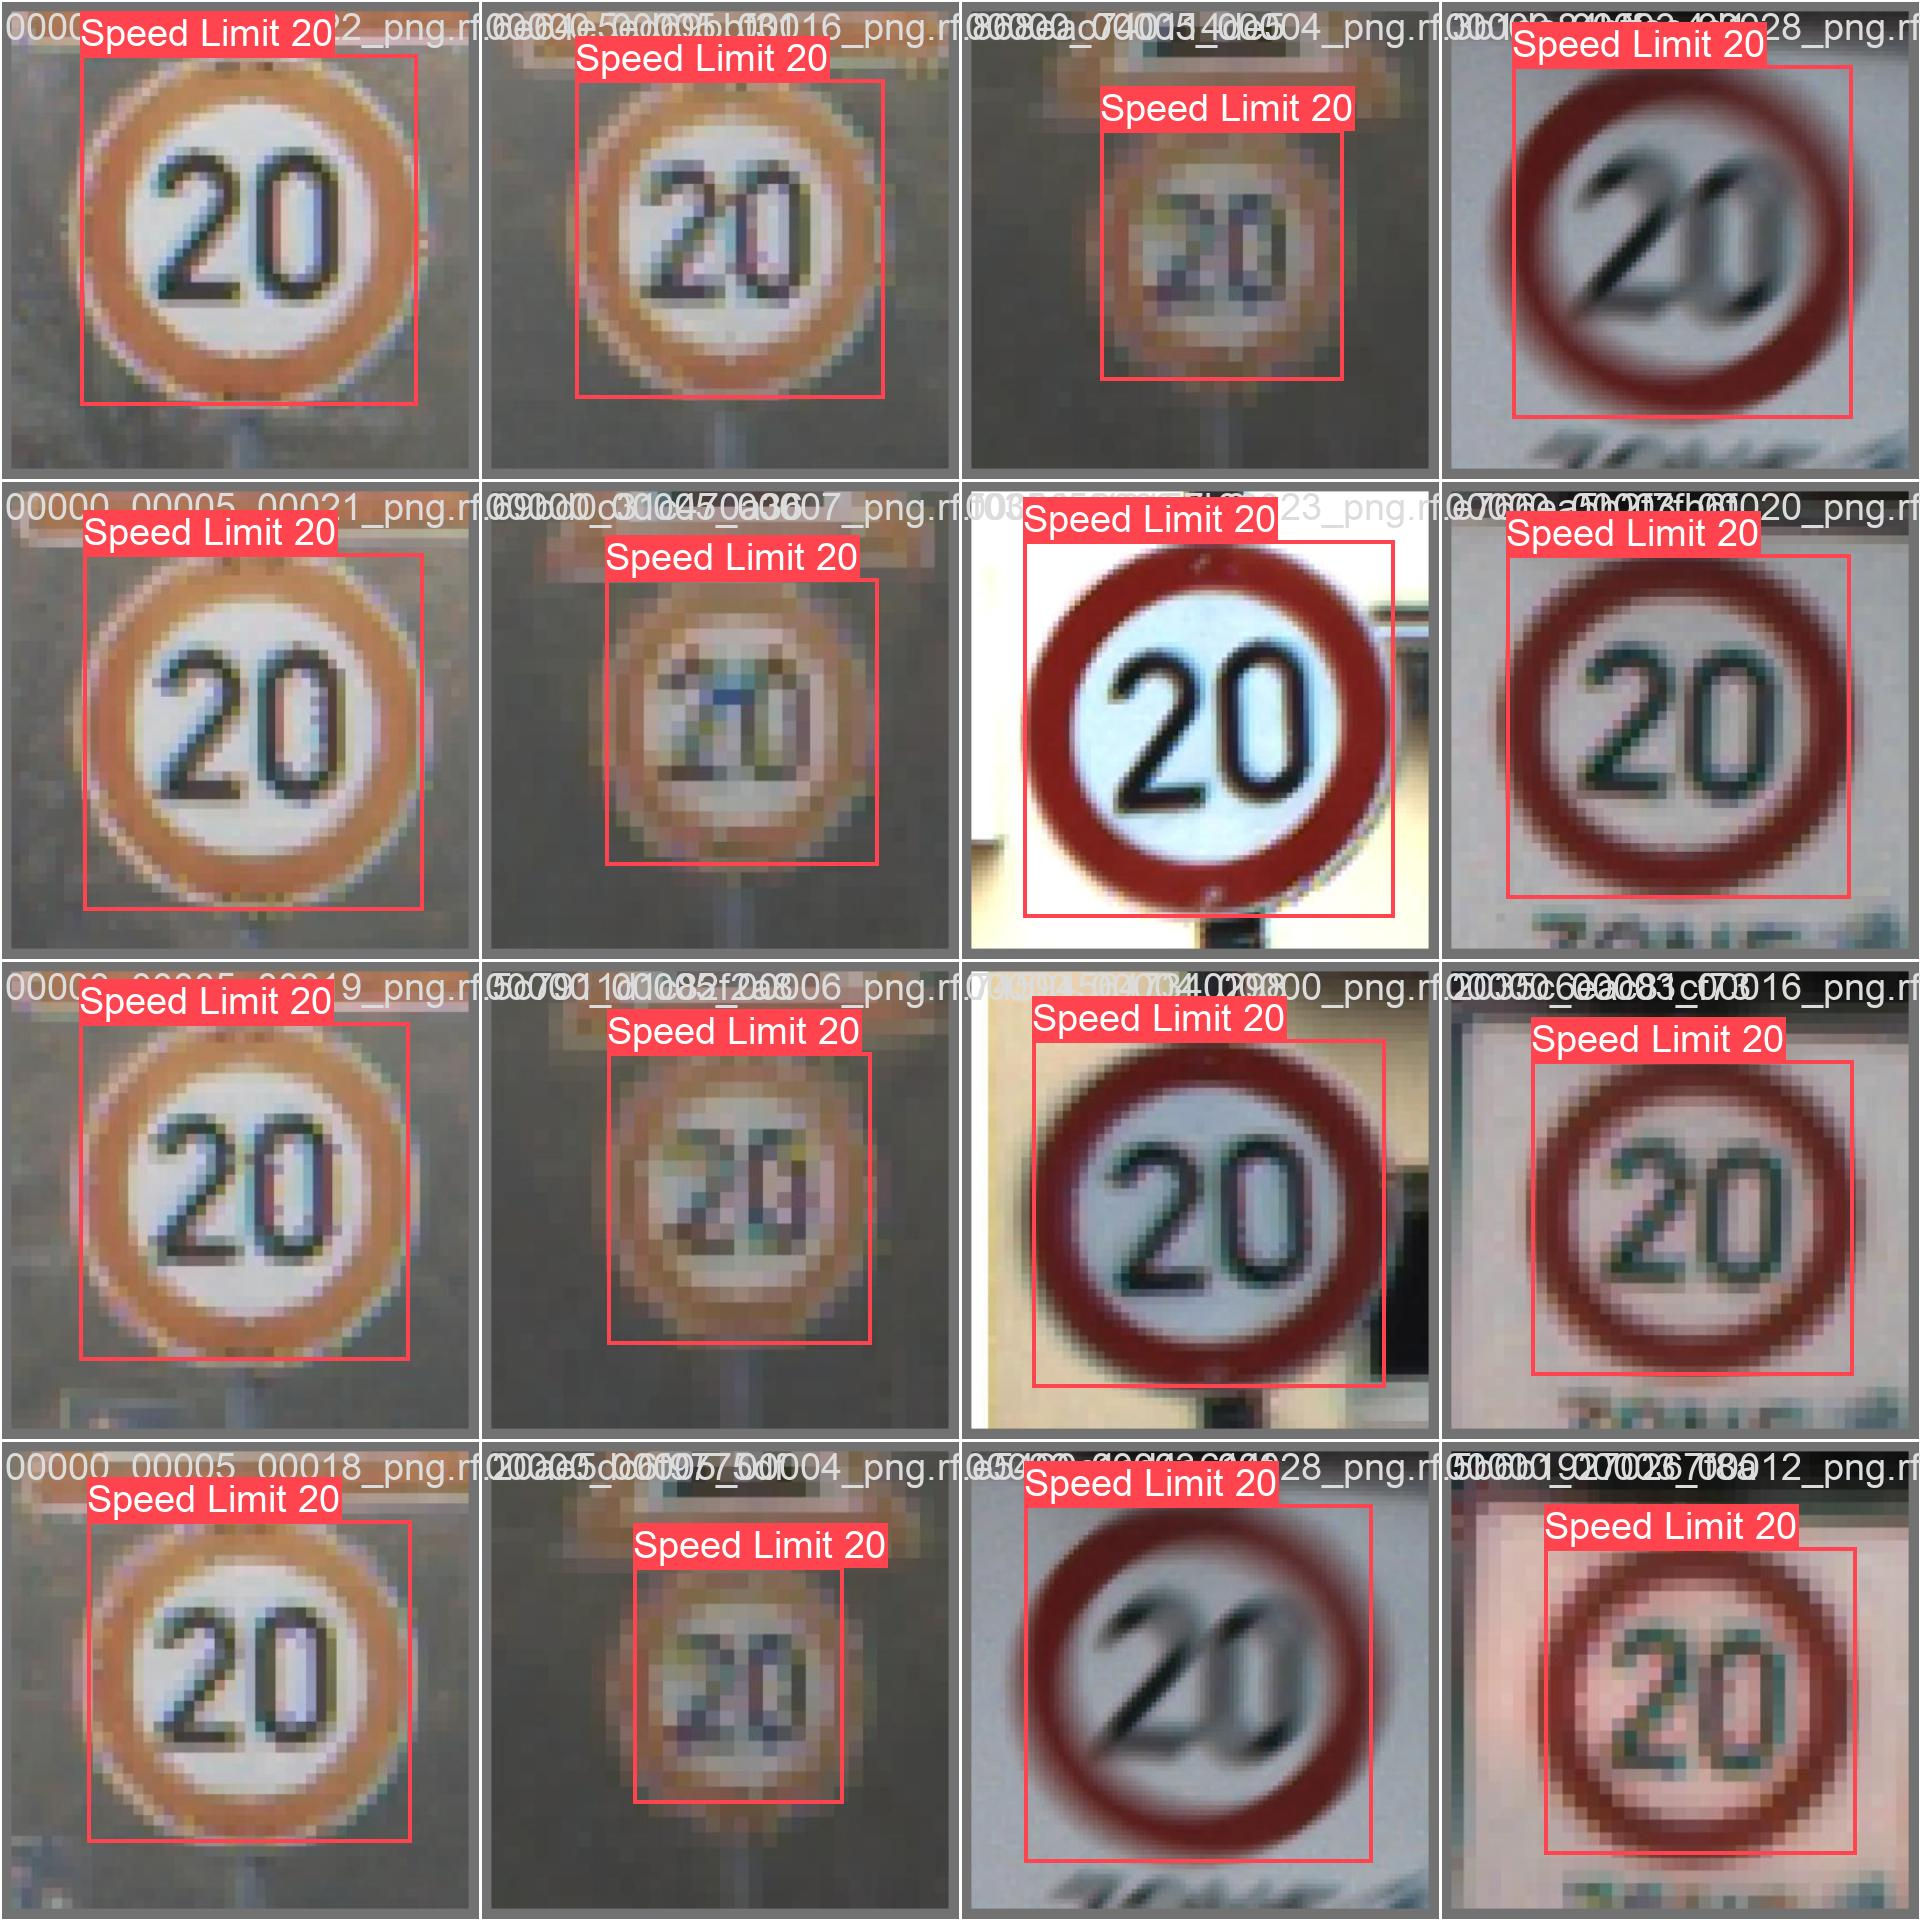

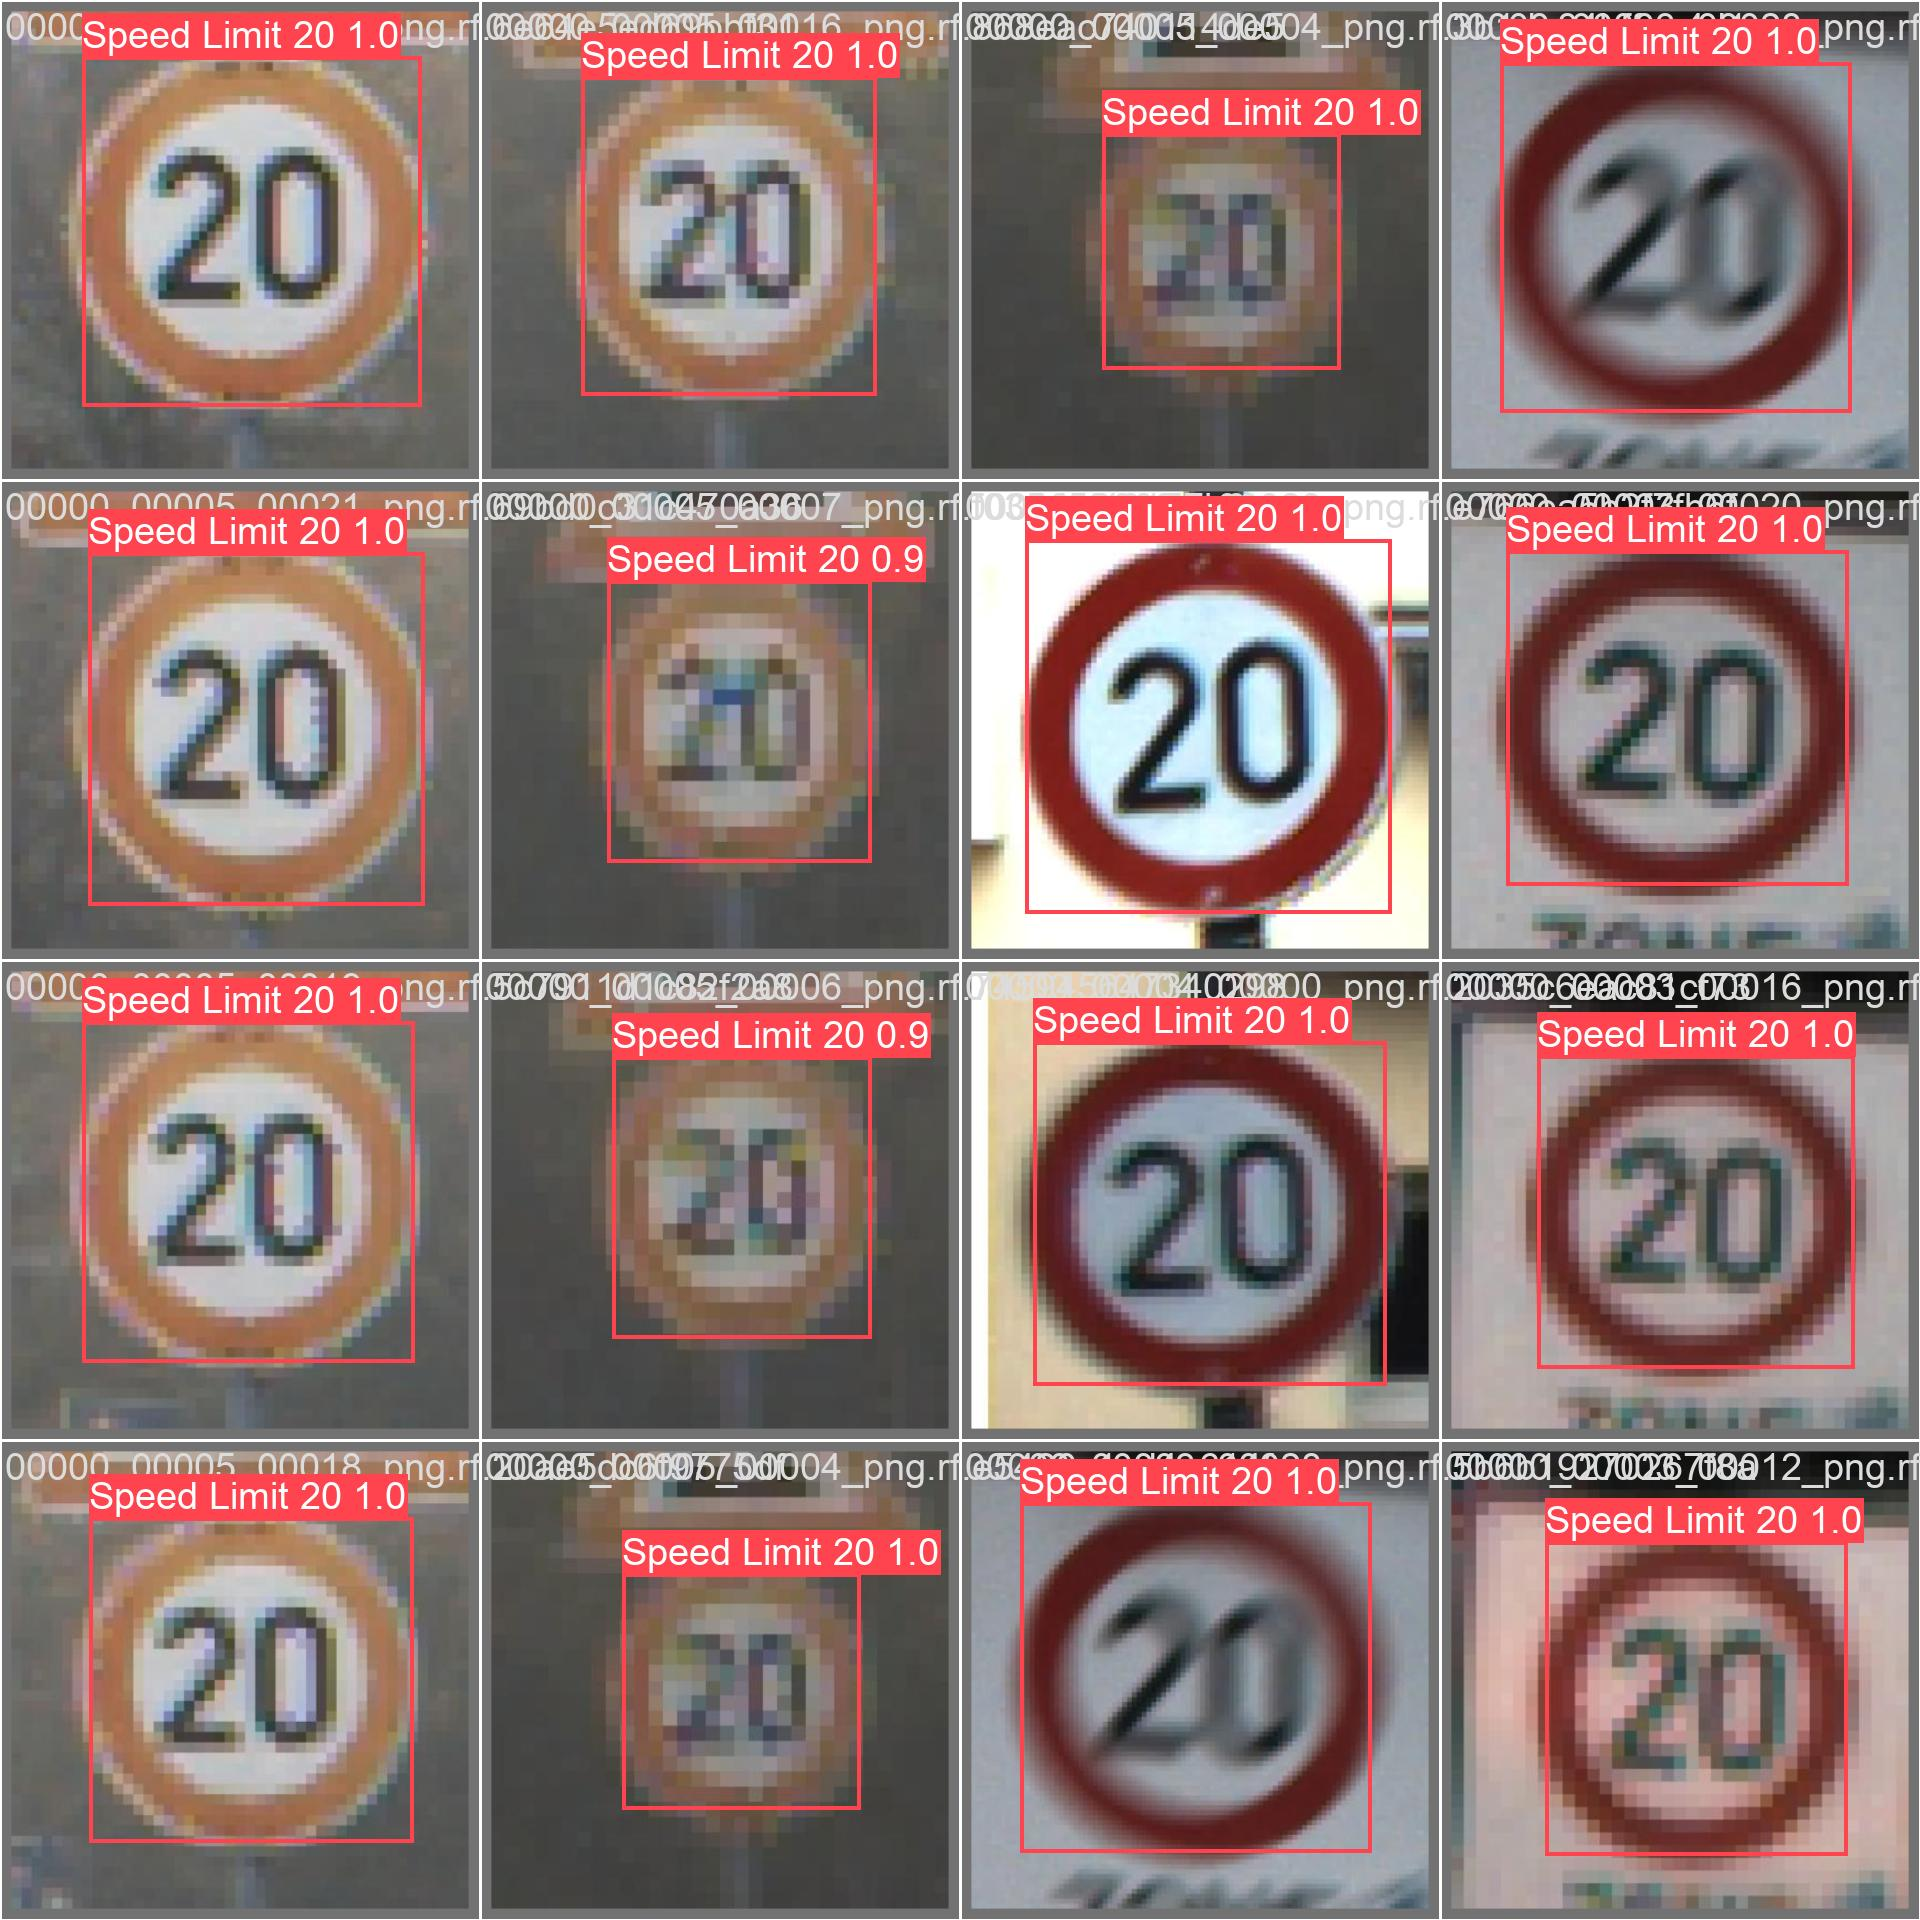

In [28]:
# Batch 0
display(Image(filename=os.path.join(val_path, "val_batch0_labels.jpg")))
display(Image(filename=os.path.join(val_path, "val_batch0_pred.jpg")))

# Batch 1
display(Image(filename=os.path.join(val_path, "val_batch1_labels.jpg")))
display(Image(filename=os.path.join(val_path, "val_batch1_pred.jpg")))

# Batch 2
display(Image(filename=os.path.join(val_path, "val_batch2_labels.jpg")))
display(Image(filename=os.path.join(val_path, "val_batch2_pred.jpg")))

# Validation Batch Predictions Explanation

These images show how the YOLO model performs on different batches from the validation set.

### Key Points:
- **Batch Labels (`val_batchX_labels.jpg`):** Ground truth annotations for each image in the batch.  
- **Batch Predictions (`val_batchX_pred.jpg`):** YOLO model predictions for the same images.

### Interpretation:
- Comparing the **predicted images** with **ground truth labels** allows you to visually assess:  
  - Correctly detected traffic signs.  
  - Missed detections (false negatives).  
  - Incorrect detections (false positives).  
- Helps identify which classes or scenarios the model performs well on and which require improvement.

**Summary:** These batch images provide a **qualitative evaluation** of the model, complementing the quantitative metrics like F1, Precision, Recall, and Confusion Matrix.

# YOLO Traffic Sign Detection


image 1/1 C:\Users\Sambridhi Shrestha\Downloads\Reflective-Stop-Sign.webp: 640x640 1 Stop, 358.7ms
Speed: 7.7ms preprocess, 358.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to C:\Users\Sambridhi Shrestha\runs\detect\predict2


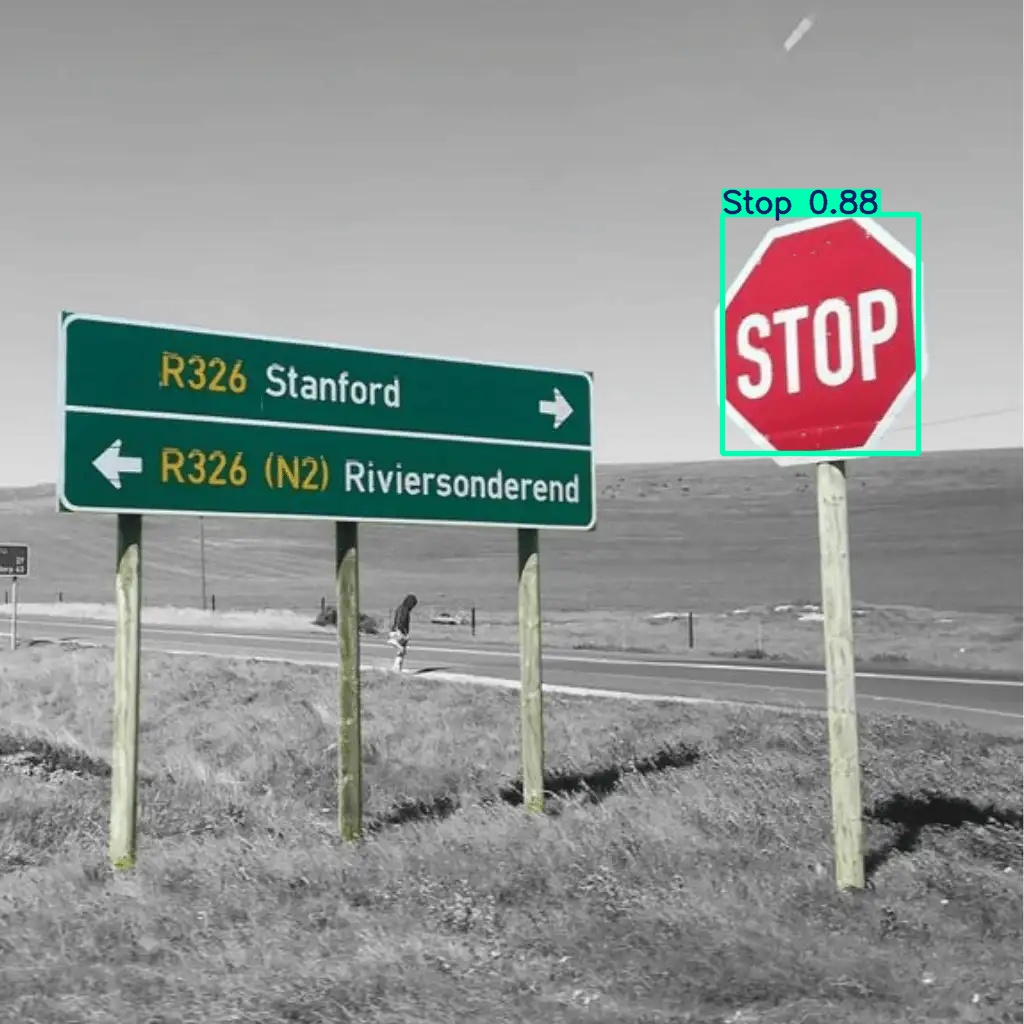

Predicted image saved at: C:\Users\Sambridhi Shrestha\runs\detect\predict2\Reflective-Stop-Sign.jpg


In [58]:
from ultralytics import YOLO
import os
from IPython.display import Image, display

def detect_traffic_sign(img_path):
    # Run prediction and save results
    results = model.predict(source=img_path, save=True)
    
    # YOLO saves predictions in 'runs/detect/predict'
    predict_dir = r"C:\Users\Sambridhi Shrestha\runs\detect\predict2"
    
    # Ensure folder exists
    if not os.path.exists(predict_dir):
        print("Prediction folder not found!")
        return
    
    # Get the latest predicted image
    predicted_image = max(
        [os.path.join(predict_dir, f) for f in os.listdir(predict_dir)],
        key=os.path.getctime
    )
    
    # Display the predicted image
    display(Image(filename=predicted_image))
    print(f"Predicted image saved at: {predicted_image}")

# Path to your test image
user_image_path = r"C:\Users\Sambridhi Shrestha\Downloads\Reflective-Stop-Sign.webp"

detect_traffic_sign(user_image_path)

# YOLO Traffic Sign Detection

This code runs the trained YOLO model on a **single input image** and displays the predicted result.

### Key Points:
- **`model.predict(source=img_path, save=True)`**:  
  Runs the YOLO model on the given image and saves the prediction output.

- **Prediction folder (`predict_dir`)**:  
  YOLO stores results in `runs/detect/predict2`. The code ensures the folder exists before displaying the result.

- **Retrieve latest prediction**:  
  Uses `os.path.getctime` to get the most recently saved image in the prediction folder.

- **Display prediction**:  
  The predicted image is displayed inline using `IPython.display.Image`.

- **Print path**:  
  Shows the file path of the saved prediction for reference.

### How to Use:
- Replace `user_image_path` with the path of any traffic sign image you want to test.  
- Call `detect_traffic_sign(user_image_path)` to see the model’s prediction.

**Summary:** This function provides a **quick, visual check** of the YOLO model’s ability to detect traffic signs in custom images.